# CLUSTERING OF BUSIEST INTERNATIONAL AIRPORTS IN THE WORLD

> Parikshit Verma (Ph:+91 9717522446)  
parikshit.iitvaranasi@gmail.com </n>  
[LinkedIn](https://www.linkedin.com/in/vermaparikshit/)  
[GitHub](https://github.com/parik309)

 **_This model aims to classify busiest international airports of the worlds on the basis of certain set of establishments/ facilities/ services/ places of interest using foursquare APIs and any other relevant data._**

In [1]:
#Libraries to import for data collection
import pandas as pd
import bs4
import requests
import matplotlib.pyplot as mpl
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import folium
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_samples, silhouette_score
import math
pd.set_option('display.max_columns',100)

# 1.0 Data collection and data wrangling

_Data required for this project comes from different sources. Since our aim is to group airports on the basis of different categories of places of interest like different types of restaurants, services, places to stay etc. this shall constitute major part of our data and shall be obtained using foursquare API. Other data like list of busiest airports and their location shall be obtained by scraping Wikipedia pages and other relevant reports._

## 1.1 Scrap foursquare category page for list of categories

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <style data-href="/docs/styles.9c58dbf9f1c0b90f47bc.css">
   code[class*=language-],pre[class*=language-]{background-color:#eef1f9;border-radius:5px;color:#393a34;direction:ltr;text-align:left;white-space:pre;word-spacing:normal;word-break:normal;font-size:13px;line-height:1.45;-moz-tab-size:4;-o-tab-size:4;tab-size:4;-webkit-hyphens:none;-ms-hyphens:none;hyphens:none}code[class*=language-]::selection,code[class*=language-] ::selection,pre[class*=language-]::selection,pre[class*=language-] ::selection{background:#c1def1}pre[class*=language-]{margin:0 0 32px;padding:20px 24px;overflow:auto}:not(pre)>code[class*=language-]{display:inline-block;margin-bottom:0;padding:1px .2em;border-radius:3px;border:1px solid #ddd;white-space:normal;word-break:break-word;vertical-align:middle;font-wei
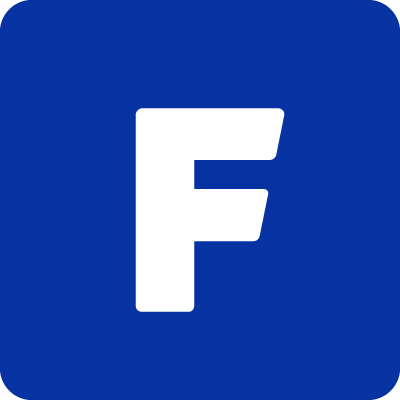

In [2]:
url="https://developer.foursquare.com/docs/build-with-foursquare/categories/"
FourSq = requests.get(url).text
soup=bs4.BeautifulSoup(FourSq,'html.parser')
print(soup.prettify())

In [4]:
#store all categories and all codes in separate lists
code=[]
name=[]
for cat_code in soup.find_all("p"):
        code.append(cat_code.text)
for cat_name in soup.find_all("h3"):
        name.append(cat_name.text)
print('No. of category code= ',len(code),' & ','No. of category name= ',len(name))

No. of category code=  1148  &  No. of category name=  941


In [5]:
# since the lengths of both lists in not matching it seems code list is having some garbage value print all categories with corresponding codes
for i in range(len(code)):
    print('Category-->{:<40}'.format(name[i]),"\t", 'Code-->',code[i])

Category-->Arts & Entertainment                     	 Code--> Below is the Foursquare Venue Category Hierarchy. Categories that specify a list of "Supported Countries" can only appear on venues in those countries. All other categories are supported globally by default. We also return a formatted JSON response of the hierarchy here.
Category-->Amphitheater                             	 Code--> Over time, our categories list may change slightly. Visit our changelog to view updates.
Category-->Aquarium                                 	 Code--> 4d4b7104d754a06370d81259
Category-->Arcade                                   	 Code--> 56aa371be4b08b9a8d5734db
Category-->Art Gallery                              	 Code--> 4fceea171983d5d06c3e9823
Category-->Bowling Alley                            	 Code--> 4bf58dd8d48988d1e1931735
Category-->Casino                                   	 Code--> 4bf58dd8d48988d1e2931735
Category-->Circus                                   	 Code--> 4bf58dd8d48988d1e4

Category-->Dive Bar                                 	 Code--> 55a5a1ebe4b013909087cb95
Category-->Gay Bar                                  	 Code--> Supported countries: IT
Category-->Hookah Bar                               	 Code--> 55a5a1ebe4b013909087cb89
Category-->Hotel Bar                                	 Code--> Supported countries: IT
Category-->Karaoke Bar                              	 Code--> 55a5a1ebe4b013909087cb9b
Category-->Pub                                      	 Code--> Supported countries: IT
Category-->Sake Bar                                 	 Code--> 55a5a1ebe4b013909087cb98
Category-->Speakeasy                                	 Code--> Supported countries: IT
Category-->Sports Bar                               	 Code--> 55a5a1ebe4b013909087cbbf
Category-->Tiki Bar                                 	 Code--> Supported countries: IT
Category-->Whisky Bar                               	 Code--> 55a5a1ebe4b013909087cb79
Category-->Wine Bar                             

Category-->Bus Line                                 	 Code--> 4cae28ecbf23941eb1190695
Category-->Bus Stop                                 	 Code--> 52e81612bcbc57f1066b7a36
Category-->Cable Car                                	 Code--> 58daa1558bbb0b01f18ec1ac
Category-->Cruise                                   	 Code--> 56aa371be4b08b9a8d5734c5
Category-->Duty-free Shop                           	 Code--> 4bf58dd8d48988d14b941735
Category-->General Travel                           	 Code--> 4e67e38e036454776db1fb3a
Category-->Heliport                                 	 Code--> 5032891291d4c4b30a586d68
Category-->Hotel                                    	 Code--> 4bf58dd8d48988d103941735
Category-->Bed & Breakfast                          	 Code--> 4f2a210c4b9023bd5841ed28
Category-->Boarding House                           	 Code--> 4d954b06a243a5684965b473
Category-->Hostel                                   	 Code--> 52f2ab2ebcbc57f1066b8b55
Category-->Hotel Pool                      

IndexError: list index out of range

It is clear that some garbage value is encountered in category code values. also note index error at last indicating code list is bigger than category list

Lets remove the garbage value to get required codes against category


In [6]:
code_clean=[]
for i,cod in enumerate(code):
    if cod[0].isnumeric():
        code_clean.append(code[i])
print('No. of category code= ',len(code_clean),' & ','No. of category name= ',len(name))

No. of category code=  941  &  No. of category name=  941


In [8]:
# lets print the data again
for i in range(len(code_clean)):
    print('Category-->{:<40}'.format(name[i]),"\t", 'Code-->',code_clean[i])

Category-->Arts & Entertainment                     	 Code--> 4d4b7104d754a06370d81259
Category-->Amphitheater                             	 Code--> 56aa371be4b08b9a8d5734db
Category-->Aquarium                                 	 Code--> 4fceea171983d5d06c3e9823
Category-->Arcade                                   	 Code--> 4bf58dd8d48988d1e1931735
Category-->Art Gallery                              	 Code--> 4bf58dd8d48988d1e2931735
Category-->Bowling Alley                            	 Code--> 4bf58dd8d48988d1e4931735
Category-->Casino                                   	 Code--> 4bf58dd8d48988d17c941735
Category-->Circus                                   	 Code--> 52e81612bcbc57f1066b79e7
Category-->Comedy Club                              	 Code--> 4bf58dd8d48988d18e941735
Category-->Concert Hall                             	 Code--> 5032792091d4c4b30a586d5c
Category-->Country Dance Club                       	 Code--> 52e81612bcbc57f1066b79ef
Category-->Disc Golf                       

Category-->County                                   	 Code--> 5345731ebcbc57f1066c39b2
Category-->Country                                  	 Code--> 530e33ccbcbc57f1066bbff7
Category-->Neighborhood                             	 Code--> 4f2a25ac4b909258e854f55f
Category-->State                                    	 Code--> 530e33ccbcbc57f1066bbff8
Category-->Town                                     	 Code--> 530e33ccbcbc57f1066bbff3
Category-->Village                                  	 Code--> 530e33ccbcbc57f1066bbff9
Category-->Summer Camp                              	 Code--> 52e81612bcbc57f1066b7a10
Category-->Trail                                    	 Code--> 4bf58dd8d48988d159941735
Category-->Tree                                     	 Code--> 52e81612bcbc57f1066b7a24
Category-->Vineyard                                 	 Code--> 4bf58dd8d48988d1de941735
Category-->Volcano                                  	 Code--> 5032848691d4c4b30a586d61
Category-->Waterfall                       

In [9]:
#Make a dataframe of categories and corresponding code
df1_category=pd.DataFrame({"Category":name,"Code":code_clean})
df1_category.set_index('Category',inplace=True)

In [10]:
print("(Row, Column) =",df1_category.shape)
df1_category.head()

(Row, Column) = (941, 1)


Code
Category                                      
Arts & Entertainment  4d4b7104d754a06370d81259
Amphitheater          56aa371be4b08b9a8d5734db
Aquarium              4fceea171983d5d06c3e9823
Arcade                4bf58dd8d48988d1e1931735
Art Gallery           4bf58dd8d48988d1e2931735

Store the category in an excel sheet for further processing in excel. It is intended to recategorise 941 categories so obtained which are relevant to our aim of classifying the busiest international airports. This is done in excel by manually grouping the four-square categories in following groups:-
																																	
__1	Eateries__	Food	BBQ Joint	Bistro	Breakfast Spot	Diner	Food Court	Food Stand	Food Truck	Friterie	Halal Restaurant	Molecular Gastronomy Restaurant	Restaurant	Salad Place	Seafood Restaurant	Theme Restaurant	Vegetarian / Vegan Restaurant	Food & Drink Shop	Airport Food Court	

__2	Asian_restaurant__	Afghan Restaurant	Asian Restaurant	Korean Restaurant	Bossam/Jokbal Restaurant	Bunsik Restaurant	Gukbap Restaurant	Janguh Restaurant	Samgyetang Restaurant	Mongolian Restaurant	Tibetan Restaurant
Comfort Food Restaurant	Gluten-free Restaurant							

__3	African_restaurant__	African Restaurant	Ethiopian Restaurant	Moroccan Restaurant	

__4	NAmerican_restaurant(_North American_)__	New American Restaurant	American Restaurant	Cajun / Creole Restaurant	Caribbean Restaurant	Cuban Restaurant	Fried Chicken Joint	Hawaiian Restaurant	Poke Place	Mac & Cheese Joint	Mexican Restaurant	Botanero	Burrito Place	Taco Place	Tex-Mex Restaurant	Yucatecan Restaurant	Poutine Place	Southern / Soul Food Restaurant	Steakhouse	Wings Joint

__5	SAmerican_restaurant(_South American_)__	Latin American Restaurant	Arepa Restaurant	Empanada Restaurant	Salvadoran Restaurant	South American Restaurant	Argentinian Restaurant	Brazilian Restaurant	Acai House	Baiano Restaurant	Central Brazilian Restaurant	Churrascaria	Empada House	Goiano Restaurant	Mineiro Restaurant	Northeastern Brazilian Restaurant		Northern Brazilian Restaurant	Pastelaria	Southeastern Brazilian Restaurant	Southern Brazilian Restaurant	Tapiocaria	Colombian Restaurant	Peruvian Restaurant	Venezuelan Restaurant

__6	Australian_restaurant__	Australian Restaurant			

__7	European_restaurant__	Austrian Restaurant	Bagel Shop	Belgian Restaurant	Czech Restaurant	Dutch Restaurant	English Restaurant	Fondue Restaurant	German Restaurant	Bavarian Restaurant	Bratwurst Joint	Currywurst Joint	Franconian Restaurant	German Pop-Up Restaurant	Palatine Restaurant	Rhenisch Restaurant	Schnitzel Restaurant	Silesian Restaurant	Swabian Restaurant	Hungarian Restaurant	Modern European Restaurant	Polish Restaurant	Portuguese Restaurant	Scandinavian Restaurant	Scottish Restaurant	Slovak Restaurant	Spanish Restaurant	Paella Restaurant	Tapas Restaurant	Swiss Restaurant

__8	IndianSub_restaurant(_Indian sub-continent_)__	Himalayan Restaurant	Bangladeshi Restaurant	Indian Restaurant	Andhra Restaurant	Awadhi Restaurant	Bengali Restaurant	Chettinad Restaurant	Dhaba	Dosa Place	Goan Restaurant	Gujarati Restaurant	Hyderabadi Restaurant	Indian Chinese Restaurant	Irani Cafe	Jain Restaurant	Karnataka Restaurant	Kerala Restaurant	Maharashtrian Restaurant	Mughlai Restaurant	Multicuisine Indian Restaurant	North Indian Restaurant	Northeast Indian Restaurant	Parsi Restaurant	Punjabi Restaurant	Rajasthani Restaurant	South Indian Restaurant	Udupi Restaurant	Pakistani Restaurant	Sri Lankan Restaurant

__9	Chinese restaurant__	Chinese Restaurant	Anhui Restaurant	Beijing Restaurant	Cantonese Restaurant	Cha Chaan Teng	Chinese Aristocrat Restaurant	Chinese Breakfast Place	Dim Sum Restaurant	Dongbei Restaurant	Fujian Restaurant	Guizhou Restaurant	Hainan Restaurant	Hakka Restaurant	Henan Restaurant	Hong Kong Restaurant	Huaiyang Restaurant	Hubei Restaurant	Hunan Restaurant	Imperial Restaurant	Jiangsu Restaurant	Jiangxi Restaurant	Macanese Restaurant	Manchu Restaurant	Peking Duck Restaurant	Shaanxi Restaurant	Shandong Restaurant	Shanghai Restaurant	Shanxi Restaurant	Szechuan Restaurant	Taiwanese Restaurant	Tianjin Restaurant	Xinjiang Restaurant	Yunnan Restaurant	Zhejiang Restaurant

__10	MiddleEastern_restaurant__	Falafel Restaurant	Jewish Restaurant	Kosher Restaurant	Kebab Restaurant	Middle Eastern Restaurant	Egyptian Restaurant	Iraqi Restaurant	Israeli Restaurant	Kurdish Restaurant	Lebanese Restaurant	Persian Restaurant	Ash and Haleem Place	Dizi Place	Gilaki Restaurant	Jegaraki	Tabbakhi	Shawarma Place	Syrian Restaurant	Yemeni Restaurant

__11	Japanese_restaurant__	Japanese Restaurant	Donburi Restaurant	Japanese Curry Restaurant	Kaiseki Restaurant	Kushikatsu Restaurant	Monjayaki Restaurant	Nabe Restaurant	Okonomiyaki Restaurant	Ramen Restaurant	Shabu-Shabu Restaurant	Soba Restaurant	Sukiyaki Restaurant	Sushi Restaurant	Takoyaki Place	Tempura Restaurant	Tonkatsu Restaurant	Udon Restaurant	Unagi Restaurant	Wagashi Place	Yakitori Restaurant	Yoshoku Restaurant	Noodle House	

__12	SouthEastAsia_restaurant__	Burmese Restaurant	Cambodian Restaurant	Filipino Restaurant	Hotpot Restaurant	Indonesian Restaurant	Indonesian Restaurant	Balinese Restaurant	Betawinese Restaurant	Indonesian Meatball Place	Javanese Restaurant	Manadonese Restaurant	Padangnese Restaurant	Sundanese Restaurant	Malay Restaurant	Mamak Restaurant	Satay Restaurant	Thai Restaurant	Som Tum Restaurant	Vietnamese Restaurant		

__13	French_restaurant__	Creperie	French Restaurant	Alsatian Restaurant	Auvergne Restaurant	Basque Restaurant	Brasserie	Breton Restaurant	Burgundian Restaurant	Catalan Restaurant	Ch'ti Restaurant	Corsican Restaurant	Estaminet	Labour Canteen	Lyonese Bouchon	Norman Restaurant	Provençal Restaurant	Savoyard Restaurant	Southwestern French Restaurant

__14	Italian_restaurant__	Italian Restaurant	Abruzzo Restaurant	Agriturismo	Aosta Restaurant	Basilicata Restaurant	Calabria Restaurant	Campanian Restaurant	Emilia Restaurant	Friuli Restaurant	Ligurian Restaurant	Lombard Restaurant	Malga	Marche Restaurant	Molise Restaurant	Piadineria	Piedmontese Restaurant	Puglia Restaurant	Romagna Restaurant	Roman Restaurant	Sardinian Restaurant	Sicilian Restaurant	South Tyrolean Restaurant	Trattoria/Osteria	Trentino Restaurant	Tuscan Restaurant	Umbrian Restaurant	Veneto Restaurant	Pizza Place	

__15	Turkish_restaurant__	Turkish Restaurant	Borek Place	Cigkofte Place	Doner Restaurant	Gozleme Place	Kofte Place	Kokoreç Restaurant	Kumpir Restaurant	Kumru Restaurant	Manti Place	Meyhane	Pide Place	Pilavcı	Söğüş Place	Tantuni Restaurant	Turkish Home Cooking Restaurant	Çöp Şiş Place

__16	Greek/Mediterranean_restaurant__	Greek Restaurant	Bougatsa Shop	Cretan Restaurant	Fish Taverna	Grilled Meat Restaurant	Kafenio	Magirio	Meze Restaurant	Modern Greek Restaurant	Ouzeri	Patsa Restaurant	Souvlaki Shop	Taverna	Tsipouro Restaurant	Mediterranean Restaurant

__17	Russia/East Eaurope_restaurant__	Eastern European Restaurant	Belarusian Restaurant	Bosnian Restaurant	Bulgarian Restaurant	Romanian Restaurant	Tatar Restaurant	Russian Restaurant	Blini House	Pelmeni House	Ukrainian Restaurant	Varenyky restaurant	West-Ukrainian Restaurant	Caucasian Restaurant

__18	Desserts/Bakery__	Bakery	Dessert Shop	Cupcake Shop	Frozen Yogurt Shop	Ice Cream Shop	Pastry Shop	Pie Shop	Donut Shop	Indian Sweet Shop	Candy Store	Chocolate Shop		

__19	Cafe__	Bubble Tea Shop	Cafeteria	Coffee Shop	Tea Room	Turkish Coffeehouse	

__20	Fast food/Snack	Burger Joint__	Deli / Bodega	Dumpling Restaurant	Fast Food Restaurant	Fish & Chips Shop	Hot Dog Joint	Sandwich Place	Snack Place	Soup Place	

__21	Pub/Bar/Brewries__	Gastropub	Apple Wine Pub	Irish Pub	Bar	Beer Bar	Cocktail Bar	Pub	Whisky Bar	Wine Bar	Champagne Bar	Brewery		

__22	Beverages/juices/shakes__	Juice Bar	Beer Store	Liquor Store	Wine Shop

__23	Waiting/Stay__	Lounge	Airport Lounge	Hotel	Bed & Breakfast	Boarding House	Hostel	Inn	Motel	Vacation Rental	Travel Lounge	

__24	General_Shopping__	Shop & Service	Baby Store	Convenience Store	Department Store	Cheese Shop	Gourmet Shop	Grocery Store	Leather Goods Store	Music Store	Toy / Game Store

__25	Gifts/ Souvenirs__	Antique Shop	Flower Shop	Gift Shop	Souvenir Shop	Thrift / Vintage Store	

__26	Electrnics_stores__	Camera Store	Electronics Store	Mobile Phone Shop	Mobility Store

__27	Lifestyle__	Clothing Store	Accessories Store	Boutique	Kids Store	Lingerie Store	Men's Store	Shoe Store	Women's Store	Costume Shop	Cosmetics Shop	Fabric Shop	Health & Beauty Service	Jewelry Store	Watch Shop	Salon / Barbershop	

__28	Books__	Bookstore	Comic Shop								

__29	Tour & Travel__	Tour Provider	Travel Agency	Bus Station	Bus Line	Bus Stop	Metro Station	Rental Car Location	Taxi Stand	Tourist Information Center	Train Station	Train	Transportation Service	

__30	Duty Free shops__	Duty-free Shop						

__31	Services__	ATM	Currency Exchange	Baggage Locker	Bike Rental / Bike Share

In [11]:
df1_category.to_excel("four_square_categories.xlsx",sheet_name="Category with code")

Read the modified category and code data in separate dataframes

In [12]:
df2_category = pd.read_excel('four_square_categories_read.xlsx', sheet_name='Re-categoriesd',header=None,skiprows=1,index_col=0,usecols=range(1,54)).T
df2_code = pd.read_excel('four_square_categories_read.xlsx', sheet_name='Codes re-categorised',header=None,skiprows=1,index_col=0,usecols=range(1,54)).T

In [13]:
df2_category.reset_index(drop=True,inplace=True)
print("(Row, Column) =",df2_category.shape)
df2_category.head()

(Row, Column) = (34, 31)


1        Eateries          Asian_restaurant    African_restaurant  \
0            Food         Afghan Restaurant    African Restaurant   
1       BBQ Joint          Asian Restaurant  Ethiopian Restaurant   
2          Bistro         Korean Restaurant   Moroccan Restaurant   
3  Breakfast Spot  Bossam/Jokbal Restaurant                   NaN   
4           Diner         Bunsik Restaurant                   NaN   

1       NAmerican_restaurant       SAmerican_restaurant  \
0    New American Restaurant  Latin American Restaurant   
1        American Restaurant           Arepa Restaurant   
2  Cajun / Creole Restaurant        Empanada Restaurant   
3       Caribbean Restaurant      Salvadoran Restaurant   
4           Cuban Restaurant  South American Restaurant   

1  Australian_restaurant  European_restaurant    IndianSub_restaurant  \
0  Australian Restaurant  Austrian Restaurant    Himalayan Restaurant   
1                    NaN           Bagel Shop  Bangladeshi Restaurant   
2                    NaN   Belgian Restaurant       Indian Restaurant   
3                    NaN     Czech Restaurant       Andhra Restaurant   
4                    NaN     Dutch Restaurant       Awadhi Restaurant   

1    Chinese restaurant   MiddleEastern_restaurant        Japanese_restaurant  \
0    Chinese Restaurant         Falafel Restaurant        Japanese Restaurant   
1      Anhui Restaurant          Jewish Restaurant         Donburi Restaurant   
2    Beijing Restaurant          Kosher Restaurant  Japanese Curry Restaurant   
3  Cantonese Restaurant           Kebab Restaurant         Kaiseki Restaurant   
4        Cha Chaan Teng  Middle Eastern Restaurant      Kushikatsu Restaurant   

1 SouthEastAsia_restaurant    French_restaurant     Italian_restaurant  \
0       Burmese Restaurant             Creperie     Italian Restaurant   
1     Cambodian Restaurant    French Restaurant     Abruzzo Restaurant   
2      Filipino Restaurant  Alsatian Restaurant            Agriturismo   
3        Hotpot Restaurant  Auvergne Restaurant       Aosta Restaurant   
4    Indonesian Restaurant    Basque Restaurant  Basilicata Restaurant   

1  Turkish_restaurant Greek/Mediterranean_restaurant  \
0  Turkish Restaurant               Greek Restaurant   
1         Borek Place                  Bougatsa Shop   
2      Cigkofte Place              Cretan Restaurant   
3    Doner Restaurant                   Fish Taverna   
4       Gozleme Place        Grilled Meat Restaurant   

1 Russia/East Eaurope_restaurant     Desserts/Bakery                 Cafe  \
0    Eastern European Restaurant              Bakery      Bubble Tea Shop   
1          Belarusian Restaurant        Dessert Shop            Cafeteria   
2             Bosnian Restaurant        Cupcake Shop          Coffee Shop   
3           Bulgarian Restaurant  Frozen Yogurt Shop             Tea Room   
4            Romanian Restaurant      Ice Cream Shop  Turkish Coffeehouse   

1       Fast food/Snack Pub/Bar/Brewries Beverages/juices/shakes  \
0          Burger Joint        Gastropub               Juice Bar   
1         Deli / Bodega   Apple Wine Pub              Beer Store   
2   Dumpling Restaurant        Irish Pub            Liquor Store   
3  Fast Food Restaurant              Bar               Wine Shop   
4     Fish & Chips Shop         Beer Bar                     NaN   

1     Waiting/Stay   General_Shopping        Gifts/ Souvenirs  \
0           Lounge     Shop & Service            Antique Shop   
1   Airport Lounge         Baby Store             Flower Shop   
2            Hotel  Convenience Store               Gift Shop   
3  Bed & Breakfast   Department Store           Souvenir Shop   
4   Boarding House        Cheese Shop  Thrift / Vintage Store   

1  Electrnics_stores          Lifestyle       Books  Tour & Travel  \
0       Camera Store     Clothing Store   Bookstore  Tour Provider   
1  Electronics Store  Accessories Store  Comic Shop  Travel Agency   
2  Mobile Phone Shop           Boutique         N

In [14]:
df2_code.reset_index(drop=True,inplace=True)
print("(Row, Column) =",df2_code.shape)
df2_code.head()

(Row, Column) = (34, 31)


1                  Eateries          Asian_restaurant  \
0  4d4b7105d754a06374d81259  503288ae91d4c4b30a586d67   
1  4bf58dd8d48988d1df931735  4bf58dd8d48988d142941735   
2  52e81612bcbc57f1066b79f1  4bf58dd8d48988d113941735   
3  4bf58dd8d48988d143941735  56aa371be4b08b9a8d5734e4   
4  4bf58dd8d48988d147941735  56aa371be4b08b9a8d5734f0   

1        African_restaurant      NAmerican_restaurant  \
0  4bf58dd8d48988d1c8941735  4bf58dd8d48988d157941735   
1  4bf58dd8d48988d10a941735  4bf58dd8d48988d14e941735   
2  4bf58dd8d48988d1c3941735  4bf58dd8d48988d17a941735   
3                       NaN  4bf58dd8d48988d144941735   
4                       NaN  4bf58dd8d48988d154941735   

1      SAmerican_restaurant     Australian_restaurant  \
0  4bf58dd8d48988d1be941735  4bf58dd8d48988d169941735   
1  4bf58dd8d48988d152941735                       NaN   
2  52939a8c3cf9994f4e043a35                       NaN   
3  5745c7ac498e5d0483112fdb                       NaN   
4  4bf58dd8d48988d1cd941735                       NaN   

1       European_restaurant      IndianSub_restaurant  \
0  52e81612bcbc57f1066b7a01  52e81612bcbc57f1066b79fb   
1  4bf58dd8d48988d179941735  5e179ee74ae8e90006e9a746   
2  52e81612bcbc57f1066b7a02  4bf58dd8d48988d10f941735   
3  52f2ae52bcbc57f1066b8b81  54135bf5e4b08f3d2429dfe5   
4  5744ccdfe4b0c0459246b4d0  54135bf5e4b08f3d2429dff3   

1        Chinese restaurant  MiddleEastern_restaurant  \
0  4bf58dd8d48988d145941735  4bf58dd8d48988d10b941735   
1  52af3a5e3cf9994f4e043bea  52e81612bcbc57f1066b79fd   
2  52af3a723cf9994f4e043bec  52e81612bcbc57f1066b79fc   
3  52af3a7c3cf9994f4e043bed  5283c7b4e4b094cb91ec88d7   
4  58daa1558bbb0b01f18ec1d3  4bf58dd8d48988d115941735   

1       Japanese_restaurant  SouthEastAsia_restaurant  \
0  4bf58dd8d48988d111941735  56aa371be4b08b9a8d573568   
1  55a59bace4b013909087cb0c  52e81612bcbc57f1066b7a03   
2  55a59bace4b013909087cb30  4eb1bd1c3b7b55596b4a748f   
3  55a59bace4b013909087cb21  52af0bd33cf9994f4e043bdd   
4  55a59bace4b013909087cb06  4deefc054765f83613cdba6f   

1         French_restaurant        Italian_restaurant  \
0  52e81612bcbc57f1066b79f2  4bf58dd8d48988d110941735   
1  4bf58dd8d48988d10c941735  55a5a1ebe4b013909087cbb6   
2  57558b36e4b065ecebd306b6  55a5a1ebe4b013909087cb7c   
3  57558b36e4b065ecebd306b8  55a5a1ebe4b013909087cba7   
4  57558b36e4b065ecebd306bc  55a5a1ebe4b013909087cba1   

1        Turkish_restaurant Greek/Mediterranean_restaurant  \
0  4f04af1f2fb6e1c99f3db0bb       4bf58dd8d48988d10e941735   
1  530faca9bcbc57f1066bc2f3       53d6c1b0e4b02351e88a83e8   
2  530faca9bcbc57f1066bc2f4       53d6c1b0e4b02351e88a83e2   
3  5283c7b4e4b094cb91ec88d8       53d6c1b0e4b02351e88a83d8   
4  5283c7b4e4b094cb91ec88d9       53d6c1b0e4b02351e88a83d6   

1 Russia/East Eaurope_restaurant           Desserts/Bakery  \
0       4bf58dd8d48988d109941735  4bf58dd8d48988d16a941735   
1       52e928d0bcbc57f1066b7e97  4bf58dd8d48988d1d0941735   
2       58daa1558bbb0b01f18ec1ee  4bf58dd8d48988d1bc941735   
3       56aa371be4b08b9a8d5734f3  512e7cae91d4cbb4e5efe0af   
4       52960bac3cf9994f4e043ac4  4bf58dd8d48988d1c9941735   

1                      Cafe           Fast food/Snack  \
0  52e81612bcbc57f1066b7a0c  4bf58dd8d48988d16c941735   
1  4bf58dd8d48988d128941735  4bf58dd8d48988d146941735   
2  4bf58dd8d48988d1e0931735  4bf58dd8d48988d108941735   
3  4bf58dd8d48988d1dc931735  4bf58dd8d48988d16e941735   
4  56aa371be4b08b9a8d5734c1  4edd64a0c7ddd24ca188df1a   

1          Pub/Bar/Brewries   Beverages/juices/shakes  \
0  4bf58dd8d48988d155941735  4bf58dd8d48988d112941735   
1  56aa371ce4b08b9a8d573583  5370f356bcbc57f1066c94c2   
2  52e81612bcbc57f1066b7a06  4bf58dd8d48988d186941735   
3  4bf58dd8d48988d116941735  4bf58dd8d48988d119951735   
4  56aa371ce4b08b9a8d57356c                       NaN   

1              Waiting/Stay          General_Shopping  \
0  4bf58dd8d48988d121941735  4d4b7105d754a06378d81259   
1  4eb1bc533b7b2c5b1d4306cb  52f2ab2ebcbc57f1066b8b32

## 1.2 Scrap wikipedia page for list of most visited cities by international tourist

In [15]:
url="https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors"
cities=pd.read_html(url,header=0)
print(len(cities))

1


In [19]:
# There is only one data frame and this is what we require for our project
df1_cities=cities[0]
df1_cities=df1_cities[['Country','City']]
print("(Row, Column) =",df1_cities.shape)
df1_cities.head()

(Row, Column) = (140, 2)


Country       City
0       Hong Kong  Hong Kong
1        Thailand    Bangkok
2  United Kingdom     London
3           China      Macau
4       Singapore  Singapore

## 1.3 Scrap wikipedia page for list of all international airports by country

In [21]:
url="https://en.wikipedia.org/wiki/List_of_international_airports_by_country"
airports=pd.read_html(url)

In [22]:
print('No. of tables =',len(airports))
s=0
for i in range(0,len(airports)):
    print("Table ",i," (Row, Column) = ",airports[i].shape)
    s+=airports[i].shape[0]
print("No. of tables=",s)

No. of tables = 235
Table  0  (Row, Column) =  (1, 2)
Table  1  (Row, Column) =  (14, 3)
Table  2  (Row, Column) =  (2, 3)
Table  3  (Row, Column) =  (1, 3)
Table  4  (Row, Column) =  (4, 3)
Table  5  (Row, Column) =  (2, 3)
Table  6  (Row, Column) =  (1, 3)
Table  7  (Row, Column) =  (2, 3)
Table  8  (Row, Column) =  (4, 3)
Table  9  (Row, Column) =  (1, 3)
Table  10  (Row, Column) =  (1, 3)
Table  11  (Row, Column) =  (1, 3)
Table  12  (Row, Column) =  (1, 3)
Table  13  (Row, Column) =  (4, 3)
Table  14  (Row, Column) =  (2, 3)
Table  15  (Row, Column) =  (1, 3)
Table  16  (Row, Column) =  (15, 3)
Table  17  (Row, Column) =  (1, 3)
Table  18  (Row, Column) =  (1, 3)
Table  19  (Row, Column) =  (1, 3)
Table  20  (Row, Column) =  (2, 3)
Table  21  (Row, Column) =  (3, 3)
Table  22  (Row, Column) =  (1, 3)
Table  23  (Row, Column) =  (2, 3)
Table  24  (Row, Column) =  (1, 3)
Table  25  (Row, Column) =  (2, 3)
Table  26  (Row, Column) =  (4, 3)
Table  27  (Row, Column) =  (1, 3)
Table  2

First table has only two rows which is not possible lets see what is there in the first table

In [23]:
airports[0]

0                                                  1
0 NaN  This article possibly contains original resear...

Since table 1 is not the data which we require hence further processing on the data without table 1 

In [24]:
df1_airport=pd.DataFrame()
for i in range(len(airports)):
    try:
        airports[i].rename(columns={'IATA':'IATA Code'},inplace=True)
    except:
        pass
    try:
        df1_airport=pd.concat([df1_airport,airports[i][['Location','Airport','IATA Code']]])
    except:
        continue

In [25]:
df1_airport.reset_index(drop=True,inplace=True)
print("(Row, Column) =",df1_airport.shape)
df1_airport.head()

(Row, Column) = (1391, 3)


Location                                     Airport IATA Code
0    Adrar  Touat-Cheikh Sidi Mohamed Belkebir Airport       AZR
1  Algiers                  Houari Boumedienne Airport       ALG
2   Annaba                         Rabah Bitat Airport       AAE
3    Batna                               Batna Airport       BLJ
4   Bejaia                             Soummam Airport       BJA

As per wikipedia page airports in certain cities are refrred by two location interchangeably like _'Toronto International Airport'_ has two locations _'Mississauga/ Toronto'_.  
These two names separated by '/' hence same are split and appended at end of dataframe

In [26]:
second_name=[]
for i,loc in enumerate(df1_airport['Location']):
    df1_airport.iloc[i,0]=df1_airport.iloc[i,0].strip()
    if len(df1_airport.iloc[i,0].split("/"))>1:
           df1_airport.iloc[i,0]=df1_airport.iloc[i,0].split("/")[0]
           second_name.append([df1_airport.iloc[i,0].split("/")[0] ,df1_airport.iloc[i,1], df1_airport.iloc[i,2]])
print(second_name)

[['Mississauga ', 'Toronto Pearson International Airport', 'YYZ'], ['Minneapolis', 'Minneapolis-Saint Paul International Airport', 'MSP'], ['Orlando', 'Orlando Sanford International Airport', 'SFB'], ['Phoenix', 'Phoenix–Mesa Gateway Airport', 'AZA'], ['Raleigh', 'Raleigh-Durham International Airport', 'RDU'], ['Sarasota', 'Sarasota-Bradenton International Airport', 'SRQ'], ['Savannah (GA)', 'Savannah/Hilton Head International Airport', 'SAV'], ['Wilkes-Barre', 'Wilkes-Barre/Scranton International Airport', 'AVP'], ['Tokyo', 'Haneda International Airport', 'HND'], ['Tokyo', 'Narita International Airport', 'NRT'], ['Kuala Lumpur', 'Kuala Lumpur International Airport', 'KUL'], ['Bangkok', 'Suvarnabhumi Airport', 'BKK'], ['Rayong', 'U-Tapao International Airport', 'UTP'], ['Brussels', 'Brussels South Charleroi Airport', 'CRL'], ['Ostend', 'Ostend-Bruges International Airport', 'OST'], ['Baden-Baden', 'Karlsruhe/Baden-Baden Airport', 'FKB'], ['Cologne', 'Cologne/Bonn Airport', 'CGN'], ['Do

In [27]:
df1_airport=pd.concat([df1_airport,pd.DataFrame(second_name,columns=['Location','Airport','IATA Code'])])

In [28]:
df1_airport.reset_index(drop=True,inplace=True)

In [29]:
print("(Row, Column) =",df1_airport.shape)
df1_airport.tail()

(Row, Column) = (1411, 3)


Location                                 Airport IATA Code
1406  Baden-Baden           Karlsruhe/Baden-Baden Airport       FKB
1407      Cologne                    Cologne/Bonn Airport       CGN
1408    Doncaster  Robin Hood Airport Doncaster Sheffield       DSA
1409   Nottingham                   East Midlands Airport       EMA
1410        Leeds    Leeds Bradford International Airport       LBA

Now finding list of airports of interest using *'df1_airport'* dataframe and *'df1_cities'* dataframe

In [30]:
df1_airportMerged=pd.merge(df1_cities,df1_airport,how='inner',left_on='City',right_on='Location')

In [31]:
print("(Row, Column) =",df1_airportMerged.shape)
df1_airportMerged.head()

(Row, Column) = (161, 5)


Country       City   Location                           Airport  \
0       Hong Kong  Hong Kong  Hong Kong   Hong Kong International Airport   
1        Thailand    Bangkok    Bangkok              Suvarnabhumi Airport   
2        Thailand    Bangkok    Bangkok  Don Mueang International Airport   
3        Thailand    Bangkok    Bangkok              Suvarnabhumi Airport   
4  United Kingdom     London     London      London International Airport   

  IATA Code  
0       HKG  
1       BKK  
2       DMK  
3       BKK  
4       YXU

In [32]:
#lets drop the duplicate airports if any in the data frame
df1_airportUseful=df1_airportMerged
df1_airportUseful.drop_duplicates(subset='Airport',inplace=True)
print("(Row, Column) =",df1_airportUseful.shape)

(Row, Column) = (155, 5)


In [33]:
#drop the location column as cit column is alsready there
df1_airportUseful.drop('Location',axis=1,inplace=True)

In [34]:
df1_airportUseful.reset_index(drop=True,inplace=True)
print("(Row, Column) =",df1_airportUseful.shape)
df1_airportUseful.head()

(Row, Column) = (155, 4)


Country       City                           Airport IATA Code
0       Hong Kong  Hong Kong   Hong Kong International Airport       HKG
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK
2        Thailand    Bangkok  Don Mueang International Airport       DMK
3  United Kingdom     London      London International Airport       YXU
4  United Kingdom     London               London City Airport       LCY

Now lets add latitude and longitude to all the airports in the data frame.  
We are going to use geopy library to find the location of airports however it may be possible that location is not returned in some cases. Keeping in view, this issue we also store such airports in separate list.

In [40]:
df1_airportUseful_ll=df1_airportUseful
lat=[]
long=[]
erata=[]
ctr=1
for i,ap in enumerate(df1_airportUseful_ll['Airport']):
    try:
        geolocator=Nominatim(user_agent="airport_exp")
        location=geolocator.geocode(ap)
        lat.append(location.latitude)
        long.append(location.longitude)
    except:
        lat.append(0.0)
        long.append(0.0)
        erata.append(ap) #storing airports whose latitude and longitudes are not returned 
        print(ctr,"- ",ap," (Unresolved co-ordinates)")
        ctr=ctr+1
df1_airportUseful_ll['Latitude']=lat
df1_airportUseful_ll['Longitude']=long

1 -  Chhatrapati Shivaji International Airport  (Unresolved co-ordinates)
2 -  Haneda International Airport  (Unresolved co-ordinates)
3 -  Prince Mohammad Bin Abdulaziz International Airport  (Unresolved co-ordinates)
4 -  Tan Son Nhat International Airport  (Unresolved co-ordinates)
5 -  Halim Perdanakusuma International Airport  (Unresolved co-ordinates)
6 -  Humberto Delgado Airport  (Unresolved co-ordinates)
7 -  Hang Nadim International Airport  (Unresolved co-ordinates)
8 -  Rio de Janeiro–Galeão International Airport  (Unresolved co-ordinates)
9 -  George Bush Intercontinental Airport  (Unresolved co-ordinates)
10 -  Ratmalana International Airport  (Unresolved co-ordinates)


> NOTE:- During successive runs it has been observed that airports whose co-ordinates are unresolved keep on changing hence following manual entry of co-ordinates is for one particular run and may not match with the list of airports with unresolved co-ordinates as above. 
  
Next cell is only for illustration purpose, however later, co-ordinates from an excel file are loaded into the data frame to maintain uniformity.  

If in case excel file containing list of airports with latitude and logitude is not available manual entry of data as folllowing may be modified to actually include all the aiports as listed above.

In [42]:
#manually entering the co-ordinates of unresolved airports
#Chhatrapati Shivaji International Airport -- 19.0896° N, 72.8656° E
#Haneda International Airport -- 35.5494° N, 139.7798° E
#Prince Mohammad Bin Abdulaziz International Airport -- 24.5544° N, 39.7146° E
#Tan Son Nhat International Airport -- 10.8185° N, 106.6588° E
#Halim Perdanakusuma International Airport --6.2653° S, 106.8846° E
#Humberto Delgado Airport -- 38.7756° N, 9.1354° W
#Hang Nadim International Airport --1.1219° N, 104.1183° E
#Rio de Janeiro–Galeão International Airport  --22.8053° S, 43.2566° W
#George Bush Intercontinental Airport --29.9902° N, 95.3368° W
#Ratmalana International Airport -- 6.8207° N, 79.8885° E
ctr=0
erata_ll=[[19.0896, 72.8656],[35.5494, 139.7798],[24.5544,39.7146],[10.8185, 106.6588],[6.2653, 106.8846],[38.7756, -9.1354],[1.1219, 104.1183],[22.8053, -43.2566],[29.9902, -95.3368],[6.8207, 79.8885]]
for i,ap in enumerate(df1_airportUseful_ll['Airport']):
    if df1_airportUseful_ll.iloc[i,4]==0 and df1_airportUseful_ll.iloc[i,5]==0:
        df1_airportUseful_ll.iloc[i,4]=erata_ll[ctr][0]
        df1_airportUseful_ll.iloc[i,5]=erata_ll[ctr][1]
        ctr=ctr+1

In [43]:
print("(Row, Column) =",df1_airportUseful_ll.shape)
df1_airportUseful_ll.head()

(Row, Column) = (155, 6)


Country       City                           Airport IATA Code  \
0       Hong Kong  Hong Kong   Hong Kong International Airport       HKG   
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK   
2        Thailand    Bangkok  Don Mueang International Airport       DMK   
3  United Kingdom     London      London International Airport       YXU   
4  United Kingdom     London               London City Airport       LCY   

    Latitude   Longitude  
0  22.312599  113.917324  
1  13.681877  100.748580  
2  13.912221  100.603531  
3  43.032364  -81.148770  
4  51.504266    0.054913

#Storing the list in excel to avoid scraping data again for successive re-runs.  
#This line to be changed to code cell and run only for first time  

df1_airportUseful_ll.to_excel('Aiports with lat long.xlsx')

In [44]:
df1_airportUseful_ll=pd.read_excel('Aiports with lat long.xlsx',index_col=0)
print("(Row, Column) =",df1_airportUseful_ll.shape)
df1_airportUseful_ll.head()

(Row, Column) = (155, 6)


Country       City                           Airport IATA Code  \
0           China  Hong Kong   Hong Kong International Airport       HKG   
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK   
2        Thailand    Bangkok  Don Mueang International Airport       DMK   
3  United Kingdom     London      London International Airport       YXU   
4  United Kingdom     London               London City Airport       LCY   

    Latitude   Longitude  
0  22.312599  113.917352  
1  13.681877  100.748580  
2  13.912221  100.603531  
3  43.032364  -81.148770  
4  51.504266    0.054913

In [45]:
#plotting the airorts
#map_world = folium.Map([30,0], zoom_start = 2, tiles='CartoDB Positron')
map_world = folium.Map([35,5], zoom_start = 2)
for i,cord in enumerate(df1_airportUseful_ll['City']):
    airport=df1_airportUseful_ll.iloc[i][2]
    city=df1_airportUseful_ll.iloc[i][1]
    country=df1_airportUseful_ll.iloc[i][0]
    lt=df1_airportUseful_ll.iloc[i][4]
    ln=df1_airportUseful_ll.iloc[i][5]
    label="{}, {}, {}".format(airport,city,country)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=2.5,
        popup=label,
        color='green',
        weight=2,
        fill=True,
        fill_color='#6FF81C',
        fill_opacity=0.5,
        parse_html=False
        ).add_to(map_world)
map_world

## 1.4 Getting data using Foursquare API

To get data using FourSquare API for each category we store URL's in one list of lists for easy retrieving and clean code.  
Moreover we are going to use count of each category for a given location and its distacne from the central point.  
This would we used to get the idea of how distributed the facilities are from central point.

In [46]:
#Function that accepts dataframe series and returns all strings concatenated and separated by comma
def category_string(lis):
    string=""
    flag=False
    for i in lis:
        if i:
            try:
                if flag:
                    string=string + ',' + i
                else:
                    string=i
                    flag=True
            except:
                continue
    return string

In [47]:
NoOfAirports = df1_airportUseful_ll.shape[0]
NoOfCategories = df2_code.shape[1]

<!--
#four square credentials hidden for privacy
CLIENT_ID = 'FQB4JTYADD4RQHXQKFSGZS4MJKAYKPZE2KNZJ1MREAU00C1V' # your Foursquare ID
CLIENT_SECRET = 'KFDZPRFZQDFYJRGHQ3KPBUAPVMENUCX4ZJM2V421POEC0FW3' # your Foursquare Secret
-->

In [49]:
# client_id and client_secret have been deleted for privacy reason.
VERSION = '20201023' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value
radius=2500

In [50]:
url=[]
sub_url=[]
categoryId=[]
for i in range(NoOfCategories):
    temp_str=category_string(df2_code.iloc[:,i])
    categoryId.append(temp_str)
for i,lat,lng in zip(range(NoOfAirports),df1_airportUseful_ll['Latitude'],df1_airportUseful_ll['Longitude']):
    temp_url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId='.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
    sub_url=[]
    for j,code_string in enumerate(categoryId):
        sub_url.append(temp_url+code_string)
    url.append(sub_url)

<!--
#Lets check one sample URL
url[0][2]
-->

In [51]:
# Function to calcualte number of occurences and distance of places beloging to one group as per URL. 
def CountAndDist(url):
    dist=0
    result=requests.get(url).json()['response']['groups'][0]['items']
    count=requests.get(url).json()['response']['totalResults']
    if count==0:
        dist=0
    else:
        for v in result:
            dist+=v['venue']['location']['distance']
    return dist,count

In [52]:
#checking the output of function 
d,c = CountAndDist(url[0][0])
print("Count = ",c)
print('Distance = ',d)
#print("Venue = ",v)

Count =  71
Distance =  107558


In [53]:
#Create a new data frame for further EDA and clustering
col=list(df2_code.columns)
col.insert(0,'Code')

In [54]:
col.append('Distribution')
df1_count=pd.DataFrame(columns=col)
df1_dist=pd.DataFrame(columns=col)

In [55]:
df1_count

Empty DataFrame
Columns: [Code, Eateries, Asian_restaurant, African_restaurant, NAmerican_restaurant, SAmerican_restaurant, Australian_restaurant, European_restaurant, IndianSub_restaurant, Chinese restaurant, MiddleEastern_restaurant, Japanese_restaurant, SouthEastAsia_restaurant, French_restaurant, Italian_restaurant, Turkish_restaurant, Greek/Mediterranean_restaurant, Russia/East Eaurope_restaurant, Desserts/Bakery, Cafe, Fast food/Snack, Pub/Bar/Brewries, Beverages/juices/shakes, Waiting/Stay, General_Shopping, Gifts/ Souvenirs, Electrnics_stores, Lifestyle, Books, Tour & Travel, Duty Free shops, Services, Distribution]
Index: []

In [56]:
distance=0
airportCode=[]
#for i in range(NoOfAirports):
    #airPortCode.append(df1_airportUseful_ll.iloc[i,3])
df1_count['Code']=df1_airportUseful_ll['IATA Code']
df1_dist['Code']=df1_airportUseful_ll['IATA Code']
df1_dist.head()

Code Eateries Asian_restaurant African_restaurant NAmerican_restaurant  \
0  HKG      NaN              NaN                NaN                  NaN   
1  BKK      NaN              NaN                NaN                  NaN   
2  DMK      NaN              NaN                NaN                  NaN   
3  YXU      NaN              NaN                NaN                  NaN   
4  LCY      NaN              NaN                NaN                  NaN   

  SAmerican_restaurant Australian_restaurant European_restaurant  \
0                  NaN                   NaN                 NaN   
1                  NaN                   NaN                 NaN   
2                  NaN                   NaN                 NaN   
3                  NaN                   NaN                 NaN   
4                  NaN                   NaN                 NaN   

  IndianSub_restaurant Chinese restaurant MiddleEastern_restaurant  \
0                  NaN                NaN                      NaN   
1                  NaN                NaN                      NaN   
2                  NaN                NaN                      NaN   
3                  NaN                NaN                      NaN   
4                  NaN                NaN                      NaN   

  Japanese_restaurant SouthEastAsia_restaurant French_restaurant  \
0                 NaN                      NaN               NaN   
1                 NaN                      NaN               NaN   
2                 NaN                      NaN               NaN   
3                 NaN                      NaN               NaN   
4                 NaN                      NaN               NaN   

  Italian_restaurant Turkish_restaurant Greek/Mediterranean_restaurant  \
0                NaN                NaN                            NaN   
1                NaN                NaN                            NaN   
2                NaN                NaN                            NaN   
3                NaN                NaN                            NaN   
4                NaN                NaN                            NaN   

  Russia/East Eaurope_restaurant Desserts/Bakery Cafe Fast food/Snack  \
0                            NaN             NaN  NaN             NaN   
1                            NaN             NaN  NaN             NaN   
2                            NaN             NaN  NaN             NaN   
3                            NaN             NaN  NaN             NaN   
4                            NaN             NaN  NaN             NaN   

  Pub/Bar/Brewries Beverages/juices/shakes Waiting/Stay General_Shopping  \
0              NaN                     NaN          NaN              NaN   
1              NaN                     NaN          NaN              NaN   
2              NaN                     NaN          NaN              NaN   
3              NaN                     NaN          NaN              NaN   
4              NaN                     NaN          NaN              NaN   

  Gifts/ Souvenirs Electrnics_stores Lifestyle Books Tour & Travel  \
0              NaN               NaN       NaN   NaN           NaN   
1              NaN               NaN       NaN   NaN           NaN   
2              NaN               NaN       NaN   NaN           NaN   
3              NaN               NaN       NaN   NaN           NaN   
4              NaN               NaN       NaN   NaN           NaN   

  Duty Free shops Services Distribution  
0             NaN      NaN          NaN  
1             NaN      NaN          NaN  
2             NaN      NaN          NaN  
3             NaN      NaN          NaN  
4             NaN      NaN          NaN

Using function _'CountAndDist'_ calculate count and distance for each actegory in all airports

In [57]:
#Run this cell only once
#current cell is re-run for one particular case for illustration purpose
#DO NOT DELETE COMMENTED LINES
#import time
#for i in range(NoOfAirports): 
i=5
while i==5:
    for j in range(NoOfCategories):
        distance,count=CountAndDist(url[i][j])
        print("(",i,",",j,")----> distance  {:<10}".format(distance),"\t", " Count= ",count)
        df1_count.iloc[i,j+1]=count
        df1_dist.iloc[i,j+1]=distance
    i=40
    #time.sleep(5)

( 5 , 0 )----> distance  32263      	  Count=  32
( 5 , 1 )----> distance  4392       	  Count=  6
( 5 , 2 )----> distance  0          	  Count=  0
( 5 , 3 )----> distance  5089       	  Count=  5
( 5 , 4 )----> distance  0          	  Count=  0
( 5 , 5 )----> distance  0          	  Count=  0
( 5 , 6 )----> distance  4681       	  Count=  4
( 5 , 7 )----> distance  7888       	  Count=  5
( 5 , 8 )----> distance  2919       	  Count=  2
( 5 , 9 )----> distance  1484       	  Count=  2
( 5 , 10 )----> distance  813        	  Count=  5
( 5 , 11 )----> distance  1963       	  Count=  1
( 5 , 12 )----> distance  1025       	  Count=  1
( 5 , 13 )----> distance  6665       	  Count=  4
( 5 , 14 )----> distance  1651       	  Count=  1
( 5 , 15 )----> distance  0          	  Count=  0
( 5 , 16 )----> distance  0          	  Count=  0
( 5 , 17 )----> distance  2601       	  Count=  3
( 5 , 18 )----> distance  26037      	  Count=  27
( 5 , 19 )----> distance  20175      	  Count=  18
( 5 , 2

#Run this cell after cahnging to code cell only if above cell is run

#Store the data in separate excel files so that API call is not required everytime the notebook is run  
df1_count.to_excel("category_count.xlsx")  
df1_dist.to_excel("category_distance.xlsx")

In [58]:
#read data from excel sheet which were created on first run
df2_count=pd.read_excel("category_count.xlsx",index_col=0)
df2_dist=pd.read_excel("category_distance.xlsx",index_col=0)

In [59]:
print("(Row, Column) =",df2_count.shape)
df2_count.head()

(Row, Column) = (155, 33)


Code  Eateries  Asian_restaurant  African_restaurant  NAmerican_restaurant  \
0  HKG        72                71                   0                     4   
1  BKK        51                55                   0                     6   
2  DMK        89                74                   0                    22   
3  YXU         6                 0                   0                     0   
4  LCY        79                15                   3                     9   

   SAmerican_restaurant  Australian_restaurant  European_restaurant  \
0                     0                      1                    2   
1                     0                      2                    1   
2                     2                      0                    4   
3                     0                      0                    0   
4                     0                      0                    7   

   IndianSub_restaurant  Chinese restaurant  MiddleEastern_restaurant  \
0                     1                  51                         0   
1                     1                   8                         1   
2                     3                   8                         3   
3                     0                   0                         0   
4                     2                   8                         2   

   Japanese_restaurant  SouthEastAsia_restaurant  French_restaurant  \
0                   18                         9                  0   
1                   24                        23                  0   
2                   63                        46                  1   
3                    0                         0                  0   
4                    4                         3                  0   

   Italian_restaurant  Turkish_restaurant  Greek/Mediterranean_restaurant  \
0                   4                   0                               0   
1                   6                   0                               0   
2                   8                   1                               0   
3                   2                   0                               0   
4                  14                   4                               0   

   Russia/East Eaurope_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
0                               0               21    33               23   
1                               0               19    46               14   
2                               1               46    84               42   
3                               0                0     3                1   
4                               0                9    27               30   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0                 8                        2            70               120   
1                 6                        5            79               112   
2                11                        6            30                86   
3                 0                        0             3                 3   
4                23                        1            28                76   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0                13                 11         58      7             27   
1                 7                  4         44      7             26   
2                 7                  2         19      6             49   
3                 0                  2          1      0              9   
4                 4                  7         23      4             31   

   Duty Free shops  Services  Distribution  
0                5         8           NaN  
1                4        19           NaN  
2                1         3           NaN  
3                0         0           NaN  
4                1         4           NaN

In [60]:
print("(Row, Column) =",df2_dist.shape)
df2_dist.head()

(Row, Column) = (155, 33)


Code  Eateries  Asian_restaurant  African_restaurant  NAmerican_restaurant  \
0  HKG    109327            121357                   0                  7305   
1  BKK     81188             78295                   0                  7123   
2  DMK    144557            122752                   0                 33220   
3  YXU      6470                 0                   0                     0   
4  LCY    138181             28125                5060                 17365   

   SAmerican_restaurant  Australian_restaurant  European_restaurant  \
0                     0                    986                 3508   
1                     0                   2436                 1185   
2                  2361                      0                 6805   
3                     0                      0                    0   
4                     0                      0                12087   

   IndianSub_restaurant  Chinese restaurant  MiddleEastern_restaurant  \
0                  1735               87804                         0   
1                  1267               11952                      2318   
2                  6337               12829                      5821   
3                     0                   0                         0   
4                  3845               15206                      4850   

   Japanese_restaurant  SouthEastAsia_restaurant  French_restaurant  \
0                30536                     16704                  0   
1                34122                     33070                  0   
2               104510                     77336                651   
3                    0                         0                  0   
4                 7976                      5577                  0   

   Italian_restaurant  Turkish_restaurant  Greek/Mediterranean_restaurant  \
0                6457                   0                               0   
1                7368                   0                               0   
2               12840                2026                               0   
3                 983                   0                               0   
4               25231                5015                               0   

   Russia/East Eaurope_restaurant  Desserts/Bakery    Cafe  Fast food/Snack  \
0                               0            30480   52012            39750   
1                               0            24113   60839            16948   
2                            1455            63034  108612            53471   
3                               0                0    2943             2195   
4                               0            15743   42755            50990   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0             11993                     3474         90011            146637   
1              9228                     7188         99275            115606   
2             19778                     7059         29630            139107   
3                 0                        0          5330              6092   
4             36767                     2150         37657            138189   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0             20862              18002      88514  10151          54127   
1              7884               4969      48795   8592          34085   
2              9647               2684      29762   8976          64467   
3                 0               2618       1644      0           6672   
4              7027              13594      41940   5545          49621   

   Duty Free shops  Services  Distribution  
0             7416     14773           NaN  
1             4432     22917           NaN  
2              904      2437           NaN  
3                0         0           NaN  
4              370      6553           NaN

# 2.0 EDA and Some more data wrangling

For exploratory data lets ignore ditribution column and analyse rest of the data set.

In [61]:
df1_vis=df2_count.iloc[0:,:-1]
df1_vis.set_index('Code', inplace = True)
print("(Row, Column) =",df1_vis.shape)
df1_vis.head()

(Row, Column) = (155, 31)


Eateries  Asian_restaurant  African_restaurant  NAmerican_restaurant  \
Code                                                                         
HKG         72                71                   0                     4   
BKK         51                55                   0                     6   
DMK         89                74                   0                    22   
YXU          6                 0                   0                     0   
LCY         79                15                   3                     9   

      SAmerican_restaurant  Australian_restaurant  European_restaurant  \
Code                                                                     
HKG                      0                      1                    2   
BKK                      0                      2                    1   
DMK                      2                      0                    4   
YXU                      0                      0                    0   
LCY                      0                      0                    7   

      IndianSub_restaurant  Chinese restaurant  MiddleEastern_restaurant  \
Code                                                                       
HKG                      1                  51                         0   
BKK                      1                   8                         1   
DMK                      3                   8                         3   
YXU                      0                   0                         0   
LCY                      2                   8                         2   

      Japanese_restaurant  SouthEastAsia_restaurant  French_restaurant  \
Code                                                                     
HKG                    18                         9                  0   
BKK                    24                        23                  0   
DMK                    63                        46                  1   
YXU                     0                         0                  0   
LCY                     4                         3                  0   

      Italian_restaurant  Turkish_restaurant  Greek/Mediterranean_restaurant  \
Code                                                                           
HKG                    4                   0                               0   
BKK                    6                   0                               0   
DMK                    8                   1                               0   
YXU                    2                   0                               0   
LCY                   14                   4                               0   

      Russia/East Eaurope_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
Code                                                                           
HKG                                0               21    33               23   
BKK                                0               19    46               14   
DMK                                1               46    84               42   
YXU                                0                0     3                1   
LCY                                0                9    27               30   

      Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
Code                                                            
HKG                  8                        2            70   
BKK                  6                        5            79   
DMK                 11                        6            30   
YXU                  0                        0             3   
LCY                 23                        1            28   

      General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
Code                                                                            
HKG                120                13                 11         58      7   
BKK                112                 7                  4        

In [62]:
#checking the data type of all the columns
df1_vis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, HKG to LOS
Data columns (total 31 columns):
Eateries                          155 non-null int64
Asian_restaurant                  155 non-null int64
African_restaurant                155 non-null int64
NAmerican_restaurant              155 non-null int64
SAmerican_restaurant              155 non-null int64
Australian_restaurant             155 non-null int64
European_restaurant               155 non-null int64
IndianSub_restaurant              155 non-null int64
Chinese restaurant                155 non-null int64
MiddleEastern_restaurant          155 non-null int64
Japanese_restaurant               155 non-null int64
SouthEastAsia_restaurant          155 non-null int64
French_restaurant                 155 non-null int64
Italian_restaurant                155 non-null int64
Turkish_restaurant                155 non-null int64
Greek/Mediterranean_restaurant    155 non-null int64
Russia/East Eaurope_restaurant    155 non-null int

Text(196.5, 0.5, '')

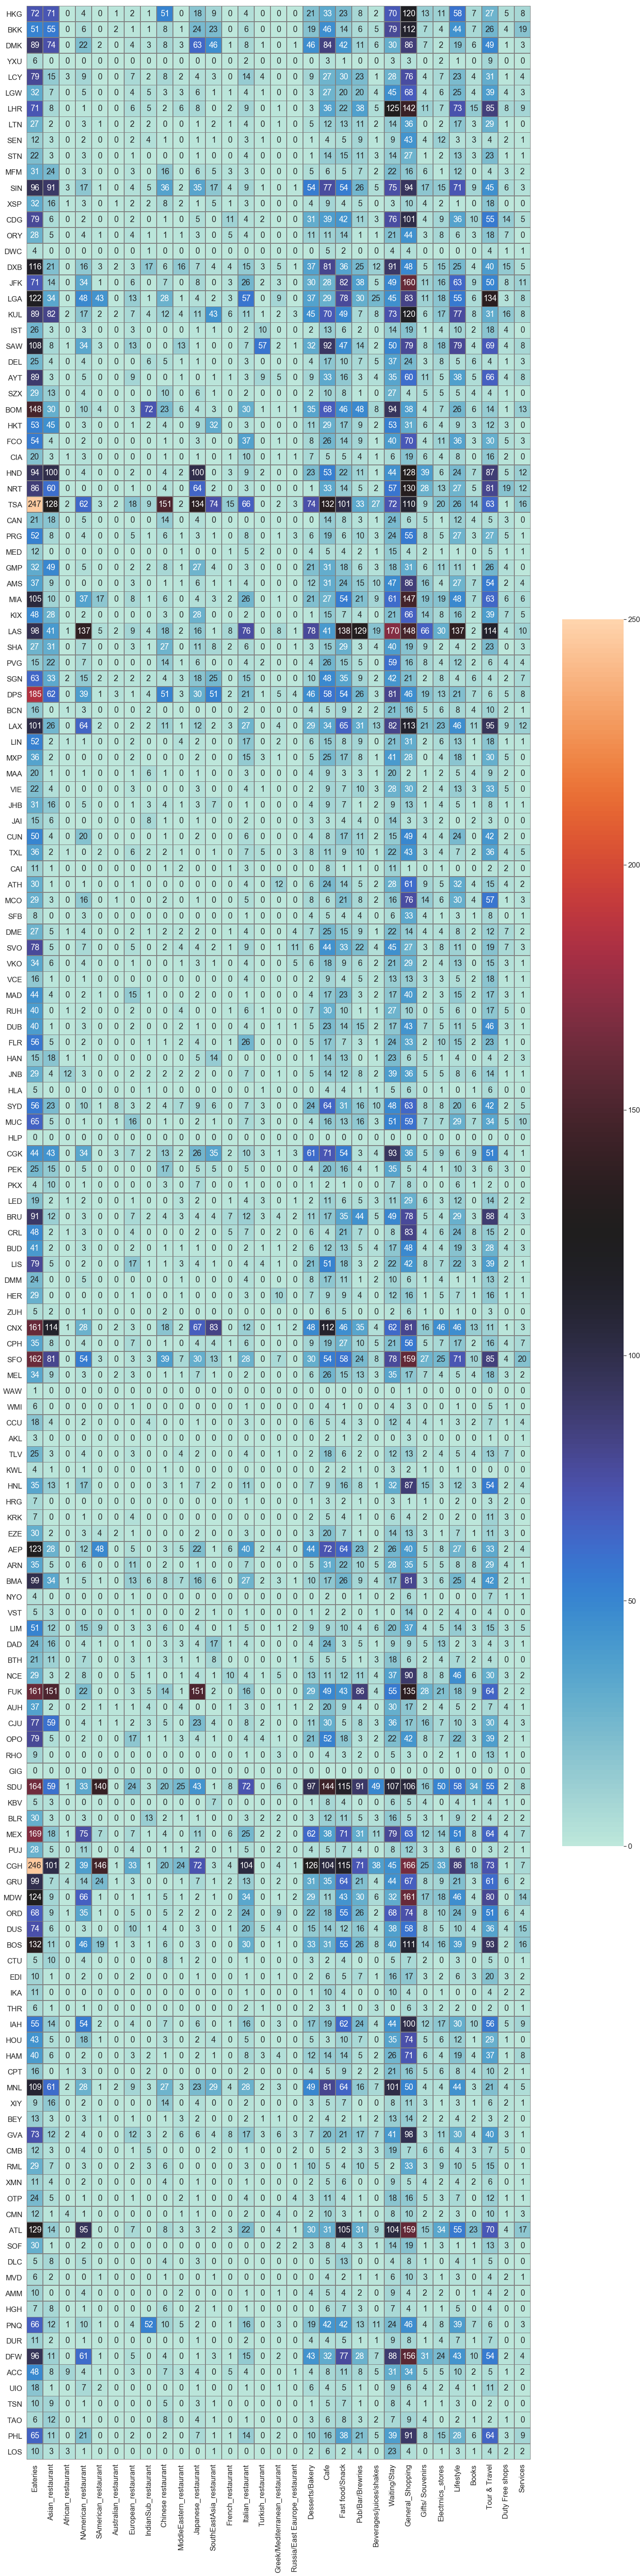

In [63]:
#drawing heatmap for better visualization
ax=mpl.figure(figsize=(25,100))
sns.set(font_scale=1.5)
ax=sns.heatmap(df1_vis,annot=True, fmt="d",cmap="icefire",vmax=250, vmin=0,cbar_kws={"shrink": 0.5},linewidths=0.5,linecolor="grey")
ax.set_ylabel("")

From heatmap it is clear that certain categories are only part of very few airports.  
These categories may lead to erroneous clustering. And hence may be clubbed with some other category to reduce skewness of data.  
Since we are going to use two clustering algorithm and choose the best result hence it is important to reduce skewness of data as far as possible.  


In [64]:
#printing count of zero values for each category
print((df2_count==0).sum(axis=0))

Code                                0
Eateries                            2
Asian_restaurant                   21
African_restaurant                121
NAmerican_restaurant               24
SAmerican_restaurant              112
Australian_restaurant             133
European_restaurant                53
IndianSub_restaurant               90
Chinese restaurant                 54
MiddleEastern_restaurant           80
Japanese_restaurant                36
SouthEastAsia_restaurant           83
French_restaurant                 100
Italian_restaurant                 19
Turkish_restaurant                113
Greek/Mediterranean_restaurant     92
Russia/East Eaurope_restaurant    120
Desserts/Bakery                    18
Cafe                                3
Fast food/Snack                     4
Pub/Bar/Brewries                   17
Beverages/juices/shakes            44
Waiting/Stay                        6
General_Shopping                    2
Gifts/ Souvenirs                   17
Electrnics_s

It is clear that out of 31 categories some dont appear in most of the airports like african_restaurant, aurtralian restaurant etc  
These may be combined with other columns to form a better feature set.

In [65]:
df3_count=df2_count
df3_dist=df2_dist

In [66]:
#from above it is clear that there are certain categories that have excessive 0 values
#like african_restaurant, aurtralian restaurant etc
#add african and australian restaurant to Eateries
df3_count['Eateries']+=df3_count['African_restaurant']+df3_count['Australian_restaurant']
#add add North american and south american restaurants in new category american restaurants
df3_count['American_restaurant']=df3_count['NAmerican_restaurant']+df3_count['SAmerican_restaurant']
#add French_restaurant Turkish_restaurant Greek/Mediterranean_restaurant and Russia/East Eaurope_restaurant
#to European restaurants
df3_count['European_restaurant']+=df3_count['French_restaurant']+df3_count['Turkish_restaurant']+df3_count['Greek/Mediterranean_restaurant']+df3_count['Russia/East Eaurope_restaurant']
# add chinese and south east asian restaurant in a new category
df3_count['Chinese/SEAsian_restaurant']=df3_count['Chinese restaurant']+df3_count['SouthEastAsia_restaurant']
#add indian and middle eastern restaurant to asian restaurant
df3_count['Asian_restaurant']+=df3_count['IndianSub_restaurant']+df3_count['MiddleEastern_restaurant']

In [67]:
#Dropping the columns that have been merged in some other column of new column
df3_count.drop(['African_restaurant','Australian_restaurant','NAmerican_restaurant','SAmerican_restaurant','French_restaurant','Turkish_restaurant','Greek/Mediterranean_restaurant','Russia/East Eaurope_restaurant','Chinese restaurant','SouthEastAsia_restaurant','IndianSub_restaurant','MiddleEastern_restaurant'],axis=1,inplace=True)

In [68]:
#moving 'Distribution' column to the end
temp=df3_count['Distribution']
df3_count.drop('Distribution',axis=1,inplace=True)
df3_count['Distribution']=temp

In [69]:
#Re-check the count o fzero value for each category
print((df3_count==0).sum(axis=0))

Code                           0
Eateries                       2
Asian_restaurant              12
European_restaurant           39
Japanese_restaurant           36
Italian_restaurant            19
Desserts/Bakery               18
Cafe                           3
Fast food/Snack                4
Pub/Bar/Brewries              17
Beverages/juices/shakes       44
Waiting/Stay                   6
General_Shopping               2
Gifts/ Souvenirs              17
Electrnics_stores             16
Lifestyle                     11
Books                         34
Tour & Travel                  4
Duty Free shops               25
Services                      47
American_restaurant           22
Chinese/SEAsian_restaurant    43
Distribution                   0
dtype: int64


In [70]:
print("(Row, Column) =",df3_count.shape)
df3_count.head()

(Row, Column) = (155, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG        73                72                    2                   18   
1  BKK        53                57                    1                   24   
2  DMK        89                80                    7                   63   
3  YXU         6                 0                    0                    0   
4  LCY        82                19                   11                    4   

   Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
0                   4               21    33               23   
1                   6               19    46               14   
2                   8               46    84               42   
3                   2                0     3                1   
4                  14                9    27               30   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0                 8                        2            70               120   
1                 6                        5            79               112   
2                11                        6            30                86   
3                 0                        0             3                 3   
4                23                        1            28                76   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0                13                 11         58      7             27   
1                 7                  4         44      7             26   
2                 7                  2         19      6             49   
3                 0                  2          1      0              9   
4                 4                  7         23      4             31   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0                5         8                    4                          60   
1                4        19                    6                          31   
2                1         3                   24                          54   
3                0         0                    0                           0   
4                1         4                    9                          11   

   Distribution  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [71]:
#Repeating the same for df2_dist data frame
#add african and australian restaurant to Eateries
df3_dist['Eateries']+=df3_dist['African_restaurant']+df3_dist['Australian_restaurant']
#add add North american and south american restaurants in new category american restaurants
df3_dist['American_restaurant']=df3_dist['NAmerican_restaurant']+df3_dist['SAmerican_restaurant']
#add French_restaurant Turkish_restaurant Greek/Mediterranean_restaurant and Russia/East Eaurope_restaurant
#to European restaurants
df3_dist['European_restaurant']+=df3_dist['French_restaurant']+df3_dist['Turkish_restaurant']+df3_dist['Greek/Mediterranean_restaurant']+df3_dist['Russia/East Eaurope_restaurant']
# add chinese and south east asian restaurant in a new category
df3_dist['Chinese/SEAsian_restaurant']=df3_dist['Chinese restaurant']+df3_dist['SouthEastAsia_restaurant']
#add indian and middle eastern restaurant to asian restaurant
df3_dist['Asian_restaurant']+=df3_dist['IndianSub_restaurant']+df3_dist['MiddleEastern_restaurant']

In [72]:
df3_dist.drop(['African_restaurant','Australian_restaurant','NAmerican_restaurant','SAmerican_restaurant','French_restaurant','Turkish_restaurant','Greek/Mediterranean_restaurant','Russia/East Eaurope_restaurant','Chinese restaurant','SouthEastAsia_restaurant','IndianSub_restaurant','MiddleEastern_restaurant'],axis=1,inplace=True)

In [73]:
#moving 'Distribution' column to the end
temp=df3_dist['Distribution']
df3_dist.drop('Distribution',axis=1,inplace=True)
df3_dist['Distribution']=temp

In [74]:
print((df3_dist==0).sum(axis=0))

Code                           0
Eateries                       2
Asian_restaurant              12
European_restaurant           39
Japanese_restaurant           36
Italian_restaurant            19
Desserts/Bakery               18
Cafe                           3
Fast food/Snack                4
Pub/Bar/Brewries              17
Beverages/juices/shakes       44
Waiting/Stay                   6
General_Shopping               2
Gifts/ Souvenirs              17
Electrnics_stores             16
Lifestyle                     11
Books                         34
Tour & Travel                  4
Duty Free shops               25
Services                      47
American_restaurant           22
Chinese/SEAsian_restaurant    43
Distribution                   0
dtype: int64


In [75]:
print("(Row, Column) =",df3_dist.shape)
df3_dist.head()

(Row, Column) = (155, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG    110313            123092                 3508                30536   
1  BKK     83624             81880                 1185                34122   
2  DMK    144557            134910                10937               104510   
3  YXU      6470                 0                    0                    0   
4  LCY    143241             36820                17102                 7976   

   Italian_restaurant  Desserts/Bakery    Cafe  Fast food/Snack  \
0                6457            30480   52012            39750   
1                7368            24113   60839            16948   
2               12840            63034  108612            53471   
3                 983                0    2943             2195   
4               25231            15743   42755            50990   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0             11993                     3474         90011            146637   
1              9228                     7188         99275            115606   
2             19778                     7059         29630            139107   
3                 0                        0          5330              6092   
4             36767                     2150         37657            138189   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0             20862              18002      88514  10151          54127   
1              7884               4969      48795   8592          34085   
2              9647               2684      29762   8976          64467   
3                 0               2618       1644      0           6672   
4              7027              13594      41940   5545          49621   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0             7416     14773                 7305                      104508   
1             4432     22917                 7123                       45022   
2              904      2437                35581                       90165   
3                0         0                    0                           0   
4              370      6553                17365                       20783   

   Distribution  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

It might be possible that certain airports have very less or none of the places as per our category.  
Those airports shall also be removed from our final list for clustering

In [76]:
delete=[]
ctr=0
for i in range(df3_count.shape[0]):
    if(df3_count.iloc[i,1:-1]==0).sum()>12:
        print(i," sum of count = ",df3_count.iloc[i,1:-1].sum())
        delete.append(i)
        ctr+=1
print("Airports with zero features >12 =",ctr)

71  sum of count =  0
87  sum of count =  2
90  sum of count =  13
111  sum of count =  0
Airports with zero features >12 = 4


In [77]:
#lets look at what airports are these
df1_airportUseful_ll.loc[delete]

Country            City                                      Airport  \
71     Indonesia         Jakarta    Halim Perdanakusuma International Airport   
87        Poland          Warsaw                      Frédéric Chopin Airport   
90   New Zealand        Auckland                             Auckland Airport   
111       Brazil  Rio de Janeiro  Rio de Janeiro–Galeão International Airport   

    IATA Code   Latitude   Longitude  
71        HLP   6.265300  106.884600  
87        WAW -33.264700  -60.284200  
90        AKL -36.656507  174.655765  
111       GIG  22.805300  -43.256600

Since these airports are major airports hence it is very unlikely that these airports have no data across all the categories. It may be possible that enough data for above 4 aiports is not available in foursquare database. 

However for the problem at hand we dont have any other source to get the data for these 4 airports hence ignoring these airports in further analysis.

In [78]:
df2_airport=df1_airportUseful_ll.drop(delete,axis=0).reset_index(drop=True)
df4_count=df3_count.drop(delete,axis=0).reset_index(drop=True)
df4_dist=df3_dist.drop(delete,axis=0).reset_index(drop=True)

In [79]:
print("(Row, Column) =",df2_airport.shape)
df2_airport.head()

(Row, Column) = (151, 6)


Country       City                           Airport IATA Code  \
0           China  Hong Kong   Hong Kong International Airport       HKG   
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK   
2        Thailand    Bangkok  Don Mueang International Airport       DMK   
3  United Kingdom     London      London International Airport       YXU   
4  United Kingdom     London               London City Airport       LCY   

    Latitude   Longitude  
0  22.312599  113.917352  
1  13.681877  100.748580  
2  13.912221  100.603531  
3  43.032364  -81.148770  
4  51.504266    0.054913

In [80]:
print("(Row, Column) =",df4_count.shape)
df4_count.head()

(Row, Column) = (151, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG        73                72                    2                   18   
1  BKK        53                57                    1                   24   
2  DMK        89                80                    7                   63   
3  YXU         6                 0                    0                    0   
4  LCY        82                19                   11                    4   

   Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
0                   4               21    33               23   
1                   6               19    46               14   
2                   8               46    84               42   
3                   2                0     3                1   
4                  14                9    27               30   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0                 8                        2            70               120   
1                 6                        5            79               112   
2                11                        6            30                86   
3                 0                        0             3                 3   
4                23                        1            28                76   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0                13                 11         58      7             27   
1                 7                  4         44      7             26   
2                 7                  2         19      6             49   
3                 0                  2          1      0              9   
4                 4                  7         23      4             31   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0                5         8                    4                          60   
1                4        19                    6                          31   
2                1         3                   24                          54   
3                0         0                    0                           0   
4                1         4                    9                          11   

   Distribution  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [81]:
print("(Row, Column) =",df4_dist.shape)
df4_dist.head()

(Row, Column) = (151, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG    110313            123092                 3508                30536   
1  BKK     83624             81880                 1185                34122   
2  DMK    144557            134910                10937               104510   
3  YXU      6470                 0                    0                    0   
4  LCY    143241             36820                17102                 7976   

   Italian_restaurant  Desserts/Bakery    Cafe  Fast food/Snack  \
0                6457            30480   52012            39750   
1                7368            24113   60839            16948   
2               12840            63034  108612            53471   
3                 983                0    2943             2195   
4               25231            15743   42755            50990   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0             11993                     3474         90011            146637   
1              9228                     7188         99275            115606   
2             19778                     7059         29630            139107   
3                 0                        0          5330              6092   
4             36767                     2150         37657            138189   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0             20862              18002      88514  10151          54127   
1              7884               4969      48795   8592          34085   
2              9647               2684      29762   8976          64467   
3                 0               2618       1644      0           6672   
4              7027              13594      41940   5545          49621   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0             7416     14773                 7305                      104508   
1             4432     22917                 7123                       45022   
2              904      2437                35581                       90165   
3                0         0                    0                           0   
4              370      6553                17365                       20783   

   Distribution  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [82]:
df2_vis=df4_count.iloc[0:,:-1]
df2_vis.set_index('Code', inplace = True)
print("(Row, Column) =",df2_vis.shape)
df2_vis.head()

(Row, Column) = (151, 21)


Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
Code                                                                         
HKG         73                72                    2                   18   
BKK         53                57                    1                   24   
DMK         89                80                    7                   63   
YXU          6                 0                    0                    0   
LCY         82                19                   11                    4   

      Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
Code                                                               
HKG                    4               21    33               23   
BKK                    6               19    46               14   
DMK                    8               46    84               42   
YXU                    2                0     3                1   
LCY                   14                9    27               30   

      Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
Code                                                            
HKG                  8                        2            70   
BKK                  6                        5            79   
DMK                 11                        6            30   
YXU                  0                        0             3   
LCY                 23                        1            28   

      General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
Code                                                                            
HKG                120                13                 11         58      7   
BKK                112                 7                  4         44      7   
DMK                 86                 7                  2         19      6   
YXU                  3                 0                  2          1      0   
LCY                 76                 4                  7         23      4   

      Tour & Travel  Duty Free shops  Services  American_restaurant  \
Code                                                                  
HKG              27                5         8                    4   
BKK              26                4        19                    6   
DMK              49                1         3                   24   
YXU               9                0         0                    0   
LCY              31                1         4                    9   

      Chinese/SEAsian_restaurant  
Code                              
HKG                           60  
BKK                           31  
DMK                           54  
YXU                            0  
LCY                           11

Text(196.5, 0.5, '')

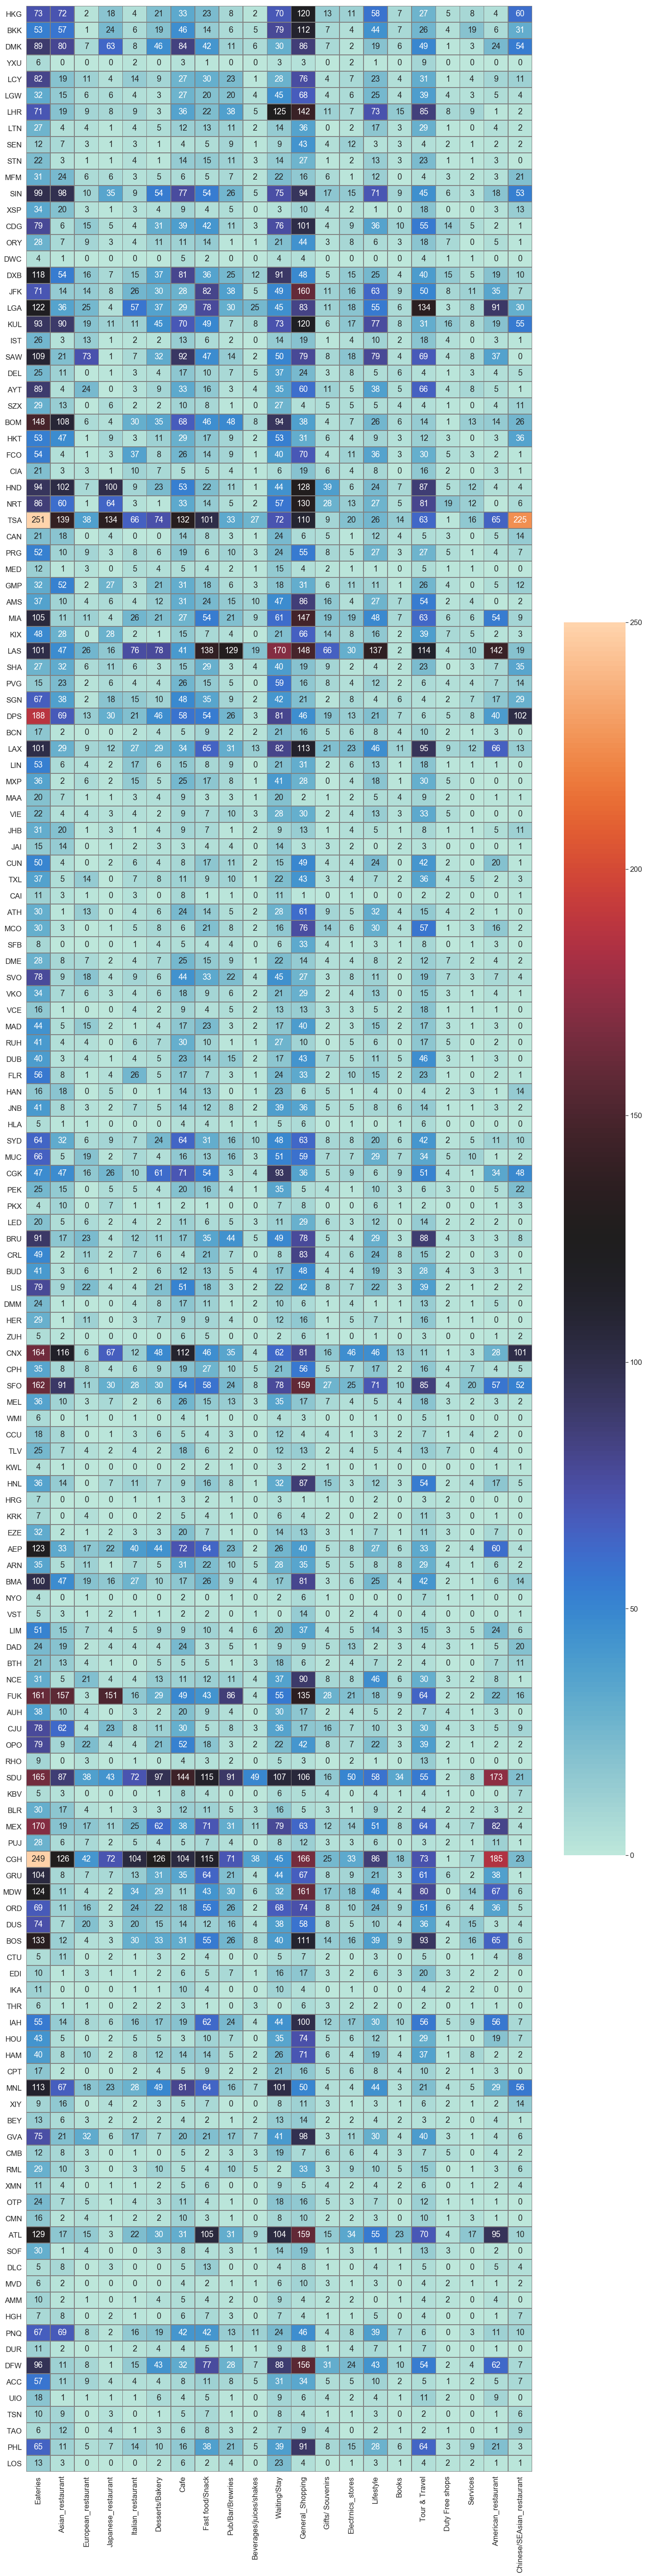

In [83]:
#again plotting heatmap
ax=mpl.figure(figsize=(25,100))
sns.set(font_scale=1.5)
ax=sns.heatmap(df2_vis,annot=True, fmt="d",cmap="icefire",vmax=250, vmin=0,cbar_kws={"shrink": 0.5},linewidths=0.5,linecolor="grey")
ax.set_ylabel("")

Now out data looks much less skewed and ready for modelling.  
But before that lets get some more insight from the data.

In [84]:
#sorting airports with in descending order of number of facilities across all groups
df2_vis['Count']=df2_vis.sum(axis=1)
df2_vis.sort_values('Count',ascending=True,inplace=True)
df2_vis.drop('Count',axis=1, inplace =True)
print("(Row, Column) =",df2_vis.shape)
df2_vis.head()

(Row, Column) = (151, 21)


Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
Code                                                                         
KWL          4                 1                    0                    0   
DWC          4                 1                    0                    0   
NYO          4                 0                    1                    0   
HRG          7                 0                    0                    0   
WMI          6                 0                    1                    0   

      Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
Code                                                               
KWL                    0                0     2                2   
DWC                    0                0     5                2   
NYO                    0                0     2                0   
HRG                    1                1     3                2   
WMI                    1                0     4                1   

      Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
Code                                                            
KWL                  1                        0             3   
DWC                  0                        0             4   
NYO                  1                        0             2   
HRG                  1                        0             3   
WMI                  0                        0             4   

      General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
Code                                                                            
KWL                  2                 1                  0          1      0   
DWC                  4                 0                  0          0      0   
NYO                  6                 1                  0          0      0   
HRG                  1                 1                  0          2      0   
WMI                  3                 0                  0          1      0   

      Tour & Travel  Duty Free shops  Services  American_restaurant  \
Code                                                                  
KWL               0                0         0                    1   
DWC               4                1         1                    0   
NYO               7                1         1                    0   
HRG               3                2         0                    0   
WMI               5                1         0                    0   

      Chinese/SEAsian_restaurant  
Code                              
KWL                            1  
DWC                            0  
NYO                            0  
HRG                            0  
WMI                            0

Text(0.5, 1.0, 'Category Count')

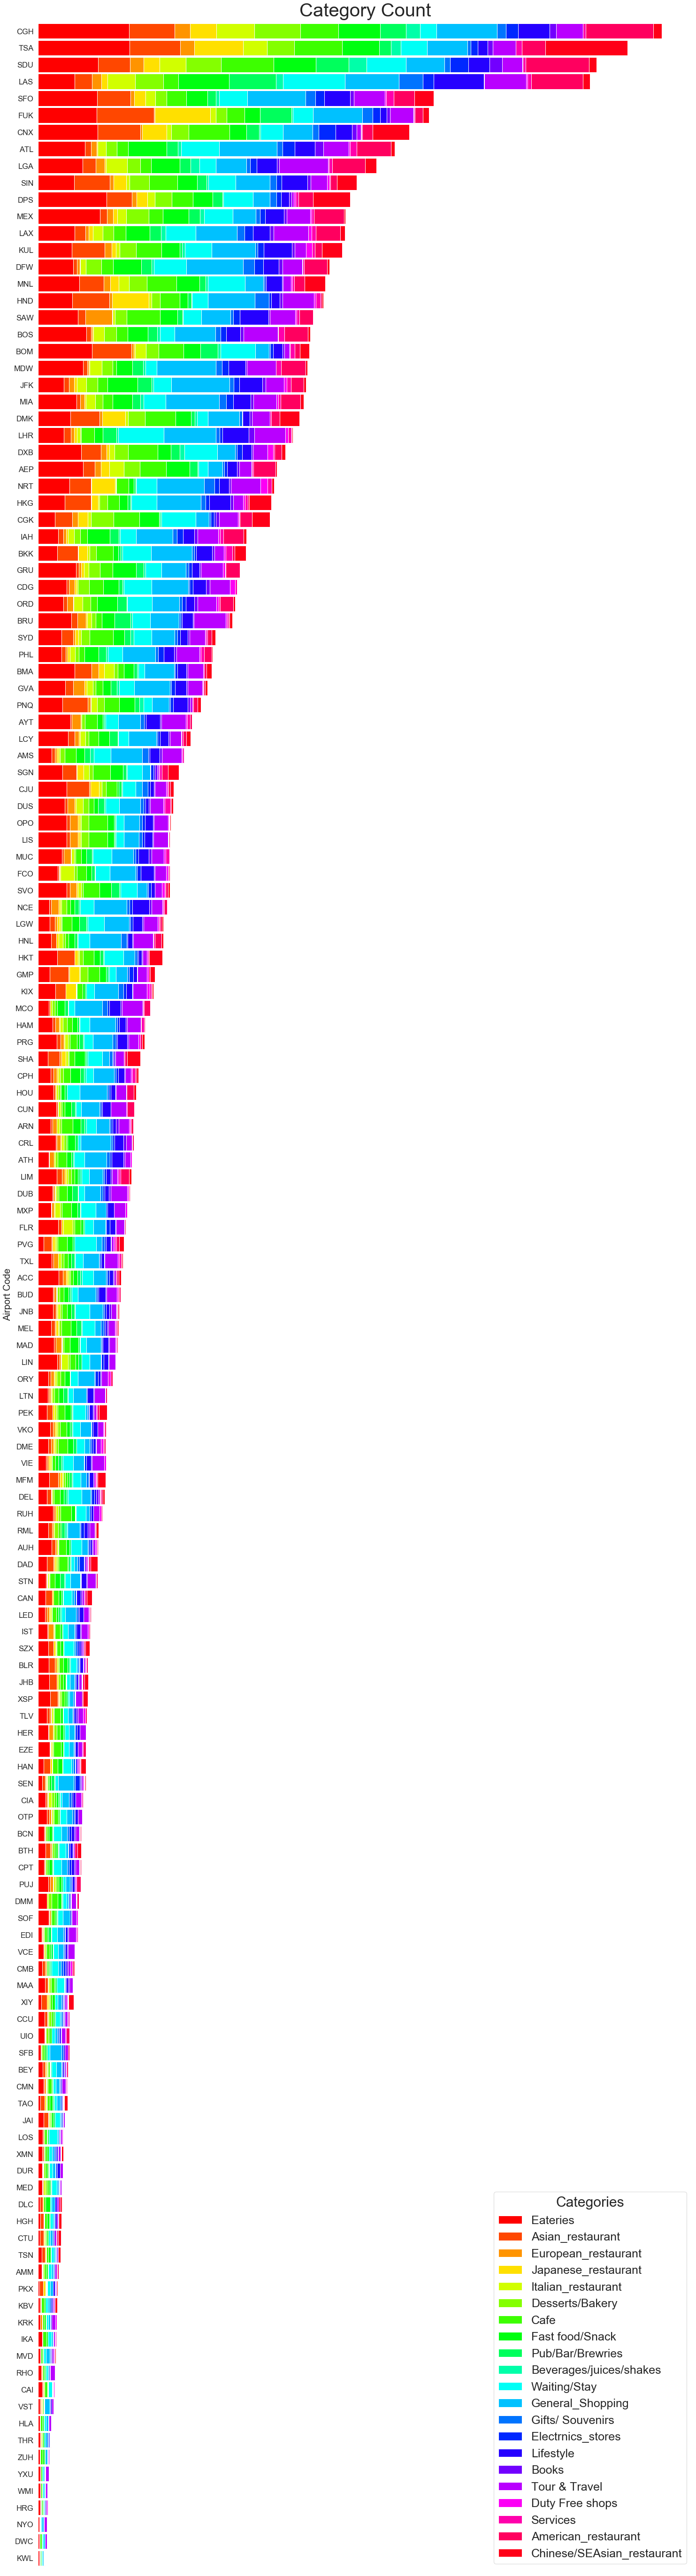

In [85]:
#lets plot a horizontal bar chart for better understanding
#sns.set(rc={'axes.facecolor':'white'})
sns.set(rc={'axes.facecolor':'white'},font_scale=1.5)
ax=df2_vis.plot(kind='barh',stacked=True, figsize=(25,100),cmap='hsv',width=0.9)
mpl.legend(title='Categories',fontsize='25', title_fontsize='30')
ax.set_ylabel("Airport Code", fontsize='20')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_title("Category Count", fontsize='40')

Adding __distribution__ column at the end of dataframe.  

__Distribution__ is mean of distance of facilities from the central point (latitude lonagitude location) for each airport. Distribution tells two things about airport
* How big the airport is?
* How distibuted are the facilities from the center of airport?

In [86]:
df4_count['Distribution']=list(round(df4_dist.iloc[0:,1:-1].sum(axis=1)/df4_count.iloc[0:,1:-1].sum(axis=1),0))
df4_dist['Distribution']=list(round(df4_dist.iloc[0:,1:-1].sum(axis=1)/df4_count.iloc[0:,1:-1].sum(axis=1),0))

In [87]:
print("(Row, Column) =",df4_count.shape)
df4_count.head()

(Row, Column) = (151, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG        73                72                    2                   18   
1  BKK        53                57                    1                   24   
2  DMK        89                80                    7                   63   
3  YXU         6                 0                    0                    0   
4  LCY        82                19                   11                    4   

   Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
0                   4               21    33               23   
1                   6               19    46               14   
2                   8               46    84               42   
3                   2                0     3                1   
4                  14                9    27               30   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0                 8                        2            70               120   
1                 6                        5            79               112   
2                11                        6            30                86   
3                 0                        0             3                 3   
4                23                        1            28                76   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0                13                 11         58      7             27   
1                 7                  4         44      7             26   
2                 7                  2         19      6             49   
3                 0                  2          1      0              9   
4                 4                  7         23      4             31   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0                5         8                    4                          60   
1                4        19                    6                          31   
2                1         3                   24                          54   
3                0         0                    0                           0   
4                1         4                    9                          11   

   Distribution  
0        1524.0  
1        1272.0  
2        1497.0  
3        1165.0  
4        1716.0

In [88]:
print("(Row, Column) =",df4_dist.shape)
df4_dist.head()

(Row, Column) = (151, 23)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG    110313            123092                 3508                30536   
1  BKK     83624             81880                 1185                34122   
2  DMK    144557            134910                10937               104510   
3  YXU      6470                 0                    0                    0   
4  LCY    143241             36820                17102                 7976   

   Italian_restaurant  Desserts/Bakery    Cafe  Fast food/Snack  \
0                6457            30480   52012            39750   
1                7368            24113   60839            16948   
2               12840            63034  108612            53471   
3                 983                0    2943             2195   
4               25231            15743   42755            50990   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0             11993                     3474         90011            146637   
1              9228                     7188         99275            115606   
2             19778                     7059         29630            139107   
3                 0                        0          5330              6092   
4             36767                     2150         37657            138189   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0             20862              18002      88514  10151          54127   
1              7884               4969      48795   8592          34085   
2              9647               2684      29762   8976          64467   
3                 0               2618       1644      0           6672   
4              7027              13594      41940   5545          49621   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0             7416     14773                 7305                      104508   
1             4432     22917                 7123                       45022   
2              904      2437                35581                       90165   
3                0         0                    0                           0   
4              370      6553                17365                       20783   

   Distribution  
0        1524.0  
1        1272.0  
2        1497.0  
3        1165.0  
4        1716.0

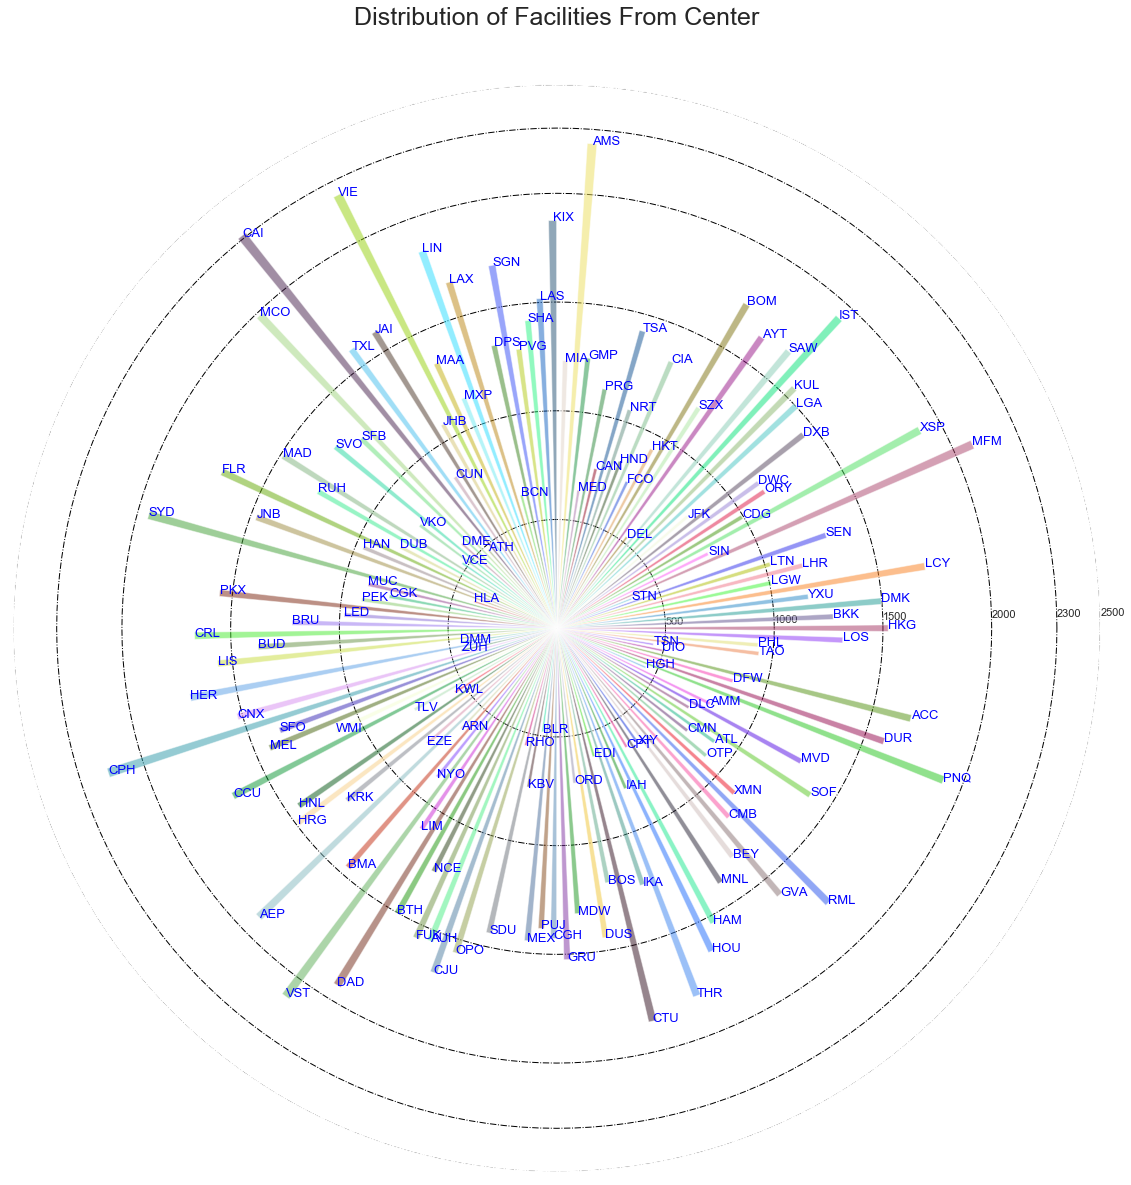

In [89]:
# Just on side note lets see how the facilities are distributed for airports in our data frame
N=df4_count.shape[0]
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
sns.set(font_scale=2)
#seaborn.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.set(rc={'axes.facecolor':'white'})
radii = np.asarray(df4_count['Distribution'])
colors = np.random.rand(len(radii),4)
ax=mpl.figure(figsize=(20,20))
#ax.set_facecolor((0,0,0))
#ax.patch.set_facecolor('black')
ax = mpl.subplot(projection='polar')
ax.bar(theta, radii, width=1/N*3, bottom=0.0, color=colors, alpha=0.5,)
ax.yaxis.grid(True,color='black',linestyle='-.')
#ax.xaxis.grid(False,color='white',linestyle='-.')
#ax.xaxis.visible=False
#ax.scatter(theta, radii, color=colors, alpha=0.5,s=500)
ax.set_yticks([500, 1000, 1500,2000,2300,2500])
ax.set_xticks([])
ax.set_rlabel_position(180/N)
ax.set_title("Distribution of Facilities From Center", fontsize='25')
for i in range(len(radii)):
    ax.annotate(df4_count['Code'][i],xy=(theta[i], radii[i]), fontsize=13,color='blue')

# 3.0 Model Developement

## 3.1 Feature Engineering

In [90]:
#Since distribution is not required as we are trying to segments airports on the basis of facilities
df1_cluster=df4_count.iloc[0:,1:-1]

Lets normalize the data frame as there are certain categories like eateries whichh have exceptionally high number of facilities in comparison to say 'services' or 'duty free shops' etc.

In [91]:
x=df1_cluster.astype(float)
norm=Normalizer()
x_trans=norm.fit_transform(x)

In [92]:
print(x_trans.shape)
x_trans

(151, 21)


array([[0.36309422, 0.35812032, 0.00994779, ..., 0.03979115, 0.01989557,
        0.2984336 ],
       [0.29494555, 0.31720559, 0.00556501, ..., 0.1057352 , 0.03339006,
        0.17251532],
       [0.42359346, 0.38075817, 0.03331634, ..., 0.01427843, 0.11422745,
        0.25701176],
       ...,
       [0.25422816, 0.50845632, 0.        , ..., 0.        , 0.04237136,
        0.38134224],
       [0.43401866, 0.07344931, 0.03338605, ..., 0.06009489, 0.14022141,
        0.02003163],
       [0.45397969, 0.10476454, 0.        , ..., 0.06984303, 0.03492151,
        0.03492151]])

## 3.2 Model Specification & Training

### 3.2.1 kMeans

Lets try first with k means and to determine optimum number of clusters by elbow method

In [93]:
minInertia=[]
for noOfGroups in range(2,20):
    kmeans=KMeans(init = 'k-means++', n_clusters = noOfGroups, n_init = 12)
    kmeans.fit(x_trans)
    minInertia.append(kmeans.inertia_)
    silhouette_avg=round(silhouette_score(x_trans,kmeans.labels_),2)
    print("No. of groups = ",noOfGroups," Silhouette score = ",silhouette_avg)
kmeans.labels_

No. of groups =  2  Silhouette score =  0.22
No. of groups =  3  Silhouette score =  0.18
No. of groups =  4  Silhouette score =  0.15
No. of groups =  5  Silhouette score =  0.14
No. of groups =  6  Silhouette score =  0.14
No. of groups =  7  Silhouette score =  0.14
No. of groups =  8  Silhouette score =  0.11
No. of groups =  9  Silhouette score =  0.13
No. of groups =  10  Silhouette score =  0.13
No. of groups =  11  Silhouette score =  0.12
No. of groups =  12  Silhouette score =  0.15
No. of groups =  13  Silhouette score =  0.13
No. of groups =  14  Silhouette score =  0.13
No. of groups =  15  Silhouette score =  0.14
No. of groups =  16  Silhouette score =  0.12
No. of groups =  17  Silhouette score =  0.14
No. of groups =  18  Silhouette score =  0.13
No. of groups =  19  Silhouette score =  0.15


array([ 3,  3, 14,  8, 13,  4,  4, 18, 16, 18, 15,  3, 14,  4,  4,  1,  2,
        4, 10,  3, 12, 12, 11, 12, 15, 15,  5, 13,  0, 17, 17, 14,  5, 13,
        2, 14,  4, 10, 17, 10,  5,  5,  9, 14, 11, 10, 13,  1,  2, 18, 14,
       15, 10, 18,  2,  4,  4, 16,  2,  2, 13, 18, 13,  2, 18, 13,  5, 11,
        1,  1, 13,  9,  5,  3,  4, 18, 16,  4, 12, 12, 12,  1, 14,  4,  0,
        2, 12, 15, 12,  9,  4, 12,  8, 12,  6,  1,  0, 18, 16,  6, 14, 15,
        4, 17,  2, 15, 12,  8,  6,  5, 15,  6,  6,  6, 10, 10, 10, 13, 10,
        7, 18,  2,  0, 10,  4,  4, 11,  9,  7, 11,  4, 11,  0,  9, 13, 12,
       10, 13,  7,  4,  2,  5,  3, 11, 10, 13,  6,  5,  7, 10,  2])

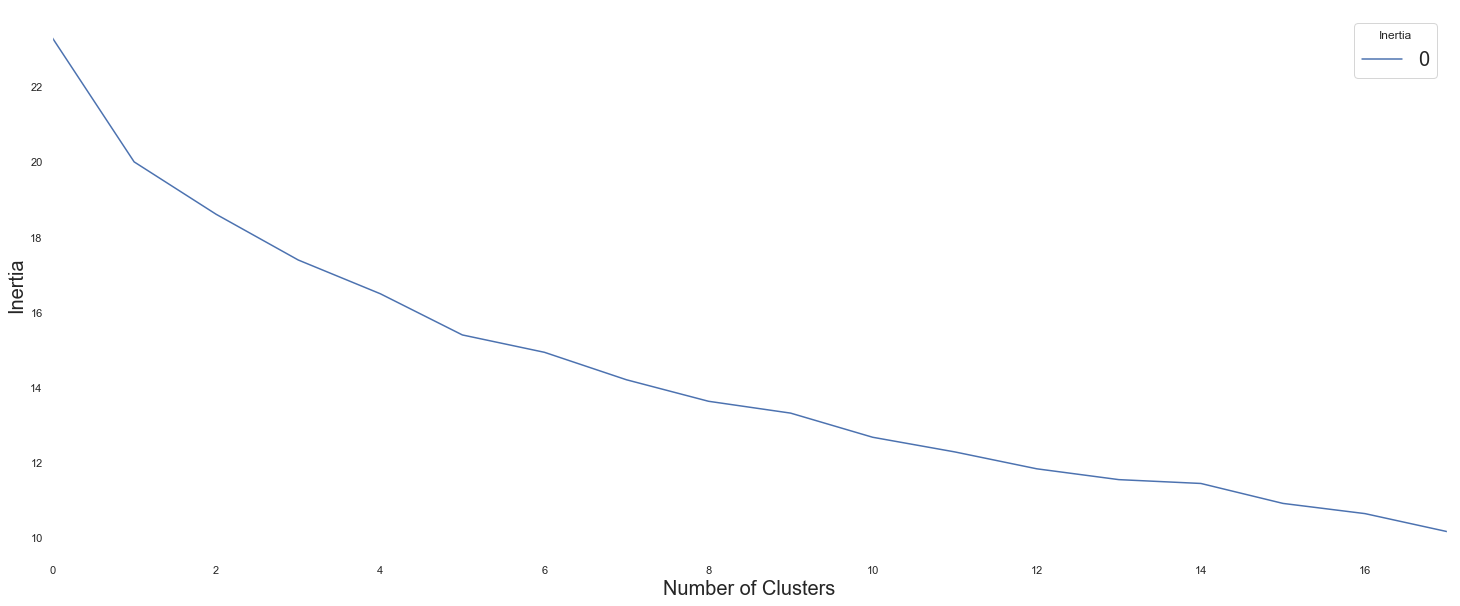

In [95]:
df=pd.DataFrame(minInertia)
ax=df.plot(figsize=(25,10))
mpl.rc('font',size=20)
ax.set_ylabel("Inertia", fontsize=20)
ax.set_xlabel("Number of Clusters", fontsize=20)
ax.legend(title='Inertia', fontsize=20)

As it is clear from above there that there is no clear elbow in the k means method run for numbur of cluster upto '20' but the Silhouette score keeps going down hence it cannot be concluded that what is the optimum number of clusters in our data set. Hence trying DBSCAN algorithm.

### 3.2.2 DBSCAN

#### _Hyperparameter tuning_

Hyperparameter __'epsilon'__ can be guessed based on the max freq of distance value between all pair of two points (one point represent one airport in '21' dimensional feature space) in dataframe.  
For this we define a function and then plot the distribution of distances so obtained.

In [96]:
# function to calculate distance between 
def find_distance(v1,v2):
    dist=0
    for i in range(len(v1)):
        dist+=pow(v1[i]-v2[i],2)
    return pow(dist,0.5)

In [97]:
dist=[]
for i in range((x_trans).shape[0]-1):
    for j in range(i+1,(x_trans).shape[0]):
        dist.append(find_distance(x_trans[i],x_trans[j]))

In [98]:
max(dist)

1.1323441985563805

<Figure size 216x144 with 0 Axes>

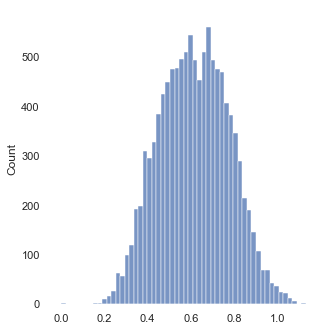

In [99]:
mpl.figure(figsize=(3,2))
#ax=.plot(kind='hist')
ax=sns.displot(dist)

Above distribution represent that most of the points are located at 0.4 to 0.8 distance apart from each other.
Hence __'epsilon'__ value is highly likely to be within 0.4 to 0.8.
While deciding the other hyperparameter __'min_samples'__ with aim to maximise the number of clusters following observation may be noted:
* For most of the values of __esp__ and __min_sample__ all airports are clustered in one group and uncategrised only
* Hence __min_samples__ has been kept as __2__ to maximise number of clusters.
* Value of __esp__ is kept __0.36__ to minimise no. of unclustered airports.

#### _Training DBSCAN_

In [100]:
db=DBSCAN(eps=0.36,min_samples=2)
db.fit(x_trans)
print(np.unique(db.labels_,return_counts=True))
db.labels_

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([ 11, 125,   3,   2,   3,   4,   3], dtype=int64))


array([ 0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  0,  0,  0,
        0,  0,  0,  0,  4, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  0,  3,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  0, -1,  0,  0,  0,  0,  0,  5,  0,  0, -1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0, -1],
      dtype=int64)

# 4.0 Result

> Hence we obtain in total 6 clusters in total with about 11 airports that cannot be clustered.  
Lets have a better look at clusters returned by the model.

In [101]:
#Assigning cluster to respective airports in data frame
df4_count['Cluster']=db.labels_

In [102]:
print("(Row, Column) =",df4_count.shape)
df4_count.head()

(Row, Column) = (151, 24)


Code  Eateries  Asian_restaurant  European_restaurant  Japanese_restaurant  \
0  HKG        73                72                    2                   18   
1  BKK        53                57                    1                   24   
2  DMK        89                80                    7                   63   
3  YXU         6                 0                    0                    0   
4  LCY        82                19                   11                    4   

   Italian_restaurant  Desserts/Bakery  Cafe  Fast food/Snack  \
0                   4               21    33               23   
1                   6               19    46               14   
2                   8               46    84               42   
3                   2                0     3                1   
4                  14                9    27               30   

   Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
0                 8                        2            70               120   
1                 6                        5            79               112   
2                11                        6            30                86   
3                 0                        0             3                 3   
4                23                        1            28                76   

   Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
0                13                 11         58      7             27   
1                 7                  4         44      7             26   
2                 7                  2         19      6             49   
3                 0                  2          1      0              9   
4                 4                  7         23      4             31   

   Duty Free shops  Services  American_restaurant  Chinese/SEAsian_restaurant  \
0                5         8                    4                          60   
1                4        19                    6                          31   
2                1         3                   24                          54   
3                0         0                    0                           0   
4                1         4                    9                          11   

   Distribution  Cluster  
0        1524.0        0  
1        1272.0        0  
2        1497.0        0  
3        1165.0        1  
4        1716.0        0

In [103]:
# Adding 'Country', 'City','Airport', 'Latitude' & 'Longitude' categories to our dataframe
df_final=pd.merge(df2_airport,df4_count,how='inner',left_on='IATA Code',right_on='Code')

In [104]:
print("(Row, Column) =",df_final.shape)
df_final.head()

(Row, Column) = (151, 30)


Country       City                           Airport IATA Code  \
0           China  Hong Kong   Hong Kong International Airport       HKG   
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK   
2        Thailand    Bangkok  Don Mueang International Airport       DMK   
3  United Kingdom     London      London International Airport       YXU   
4  United Kingdom     London               London City Airport       LCY   

    Latitude   Longitude Code  Eateries  Asian_restaurant  \
0  22.312599  113.917352  HKG        73                72   
1  13.681877  100.748580  BKK        53                57   
2  13.912221  100.603531  DMK        89                80   
3  43.032364  -81.148770  YXU         6                 0   
4  51.504266    0.054913  LCY        82                19   

   European_restaurant  Japanese_restaurant  Italian_restaurant  \
0                    2                   18                   4   
1                    1                   24                   6   
2                    7                   63                   8   
3                    0                    0                   2   
4                   11                    4                  14   

   Desserts/Bakery  Cafe  Fast food/Snack  Pub/Bar/Brewries  \
0               21    33               23                 8   
1               19    46               14                 6   
2               46    84               42                11   
3                0     3                1                 0   
4                9    27               30                23   

   Beverages/juices/shakes  Waiting/Stay  General_Shopping  Gifts/ Souvenirs  \
0                        2            70               120                13   
1                        5            79               112                 7   
2                        6            30                86                 7   
3                        0             3                 3                 0   
4                        1            28                76                 4   

   Electrnics_stores  Lifestyle  Books  Tour & Travel  Duty Free shops  \
0                 11         58      7             27                5   
1                  4         44      7             26                4   
2                  2         19      6             49                1   
3                  2          1      0              9                0   
4                  7         23      4             31                1   

   Services  American_restaurant  Chinese/SEAsian_restaurant  Distribution  \
0         8                    4                          60        1524.0   
1        19                    6                          31        1272.0   
2         3                   24                          54        1497.0   
3         0                    0                           0        1165.0   
4         4                    9                          11        1716.0   

   Cluster  
0        0  
1        0  
2        0  
3        1  
4        0

In [105]:
#drop 'Code' column as it is same as 'IATA Code'
df_final.drop('Code',axis=1, inplace=True)

In [106]:
print("(Row, Column) =",df_final.shape)
df_final.head()

(Row, Column) = (151, 29)


Country       City                           Airport IATA Code  \
0           China  Hong Kong   Hong Kong International Airport       HKG   
1        Thailand    Bangkok              Suvarnabhumi Airport       BKK   
2        Thailand    Bangkok  Don Mueang International Airport       DMK   
3  United Kingdom     London      London International Airport       YXU   
4  United Kingdom     London               London City Airport       LCY   

    Latitude   Longitude  Eateries  Asian_restaurant  European_restaurant  \
0  22.312599  113.917352        73                72                    2   
1  13.681877  100.748580        53                57                    1   
2  13.912221  100.603531        89                80                    7   
3  43.032364  -81.148770         6                 0                    0   
4  51.504266    0.054913        82                19                   11   

   Japanese_restaurant  Italian_restaurant  Desserts/Bakery  Cafe  \
0                   18                   4               21    33   
1                   24                   6               19    46   
2                   63                   8               46    84   
3                    0                   2                0     3   
4                    4                  14                9    27   

   Fast food/Snack  Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
0               23                 8                        2            70   
1               14                 6                        5            79   
2               42                11                        6            30   
3                1                 0                        0             3   
4               30                23                        1            28   

   General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
0               120                13                 11         58      7   
1               112                 7                  4         44      7   
2                86                 7                  2         19      6   
3                 3                 0                  2          1      0   
4                76                 4                  7         23      4   

   Tour & Travel  Duty Free shops  Services  American_restaurant  \
0             27                5         8                    4   
1             26                4        19                    6   
2             49                1         3                   24   
3              9                0         0                    0   
4             31                1         4                    9   

   Chinese/SEAsian_restaurant  Distribution  Cluster  
0                          60        1524.0        0  
1                          31        1272.0        0  
2                          54        1497.0        0  
3                           0        1165.0        1  
4                          11        1716.0        0

In [109]:
#plotting the airorts
#map_world = folium.Map([30,0], zoom_start = 2, tiles='CartoDB Positron')
map_world = folium.Map([35,5], zoom_start = 2,tiles='CartoDB Positron')
color=['red','blue','green','orange','cyan','Magenta','yellow']
for i,cord in enumerate(df_final['City']):
    airport=df_final.iloc[i,2]
    city=df_final.iloc[i,1]
    country=df_final.iloc[i,0]
    lt=df_final.iloc[i,4]
    ln=df_final.iloc[i,5]
    if df_final.iloc[i,-1]>=0:
        cluster=" Cluster="+str(df_final.iloc[i,-1]+1)
    else:
        cluster='Unclustered'
    label="{}, {}, {}, {}".format(airport,city,country,cluster)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=2.5,
        popup=label,
        color=color[df_final.iloc[i,-1]],
        weight=2,
        fill=True,
        fill_color=color[df_final.iloc[i,-1]],
        fill_opacity=0.5,
        parse_html=False
        ).add_to(map_world)
map_world

# 5.0 Conclusion & Discussion
 
 Seeing at the clusters obtained by out analysis it is quite clear that there is not much dissimilarity between most of the international airports in the world depending on the cateries under consideration.  
However it is also inetresting to note that there are many peculier features for each of the clusters that we have obtained and also the aiports that could not be clustered. Now we shall have a look at each of the cluster in detail.

## Cluster 1

In [110]:
Cluster1=df_final[df_final['Cluster']==0]

In [108]:
print("(Row, Column) =",Cluster1.shape)
Cluster1

(Row, Column) = (125, 29)


Country           City  \
0                   China      Hong Kong   
1                Thailand        Bangkok   
2                Thailand        Bangkok   
4          United Kingdom         London   
5          United Kingdom         London   
6          United Kingdom         London   
7          United Kingdom         London   
9          United Kingdom         London   
10                  China          Macau   
11              Singapore      Singapore   
13                 France          Paris   
14                 France          Paris   
15   United Arab Emirates          Dubai   
16   United Arab Emirates          Dubai   
17          United States  New York City   
18          United States  New York City   
19               Malaysia   Kuala Lumpur   
20                 Turkey       Istanbul   
21                 Turkey       Istanbul   
22                  India          Delhi   
23                 Turkey        Antalya   
24                  China       Shenzhen   
25                  India         Mumbai   
26               Thailand         Phuket   
27                  Italy           Rome   
28                  Italy           Rome   
31                 Taiwan         Taipei   
32                  China      Guangzhou   
33         Czech Republic         Prague   
34           Saudi Arabia         Medina   
..                    ...            ...   
113                Brazil      São Paulo   
114                Brazil      São Paulo   
115         United States        Chicago   
116         United States        Chicago   
117               Germany     Düsseldorf   
118         United States         Boston   
120        United Kingdom      Edinburgh   
121                  Iran         Tehran   
123         United States        Houston   
124         United States        Houston   
125               Germany        Hamburg   
126          South Africa      Cape Town   
127           Philippines         Manila   
129               Lebanon         Beirut   
130           Switzerland         Geneva   
132             Sri Lanka        Colombo   
134               Romania      Bucharest   
135               Morocco     Casablanca   
136         United States        Atlanta   
137              Bulgaria          Sofia   
139               Uruguay     Montevideo   
140                Jordan          Amman   
141                 China       Hangzhou   
142                 India           Pune   
143          South Africa         Durban   
144         United States         Dallas   
145                 Ghana          Accra   
146               Ecuador          Quito   
147                 China        Tianjin   
149         United States   Philadelphia   

                                               Airport IATA Code   Latitude  \
0                      Hong Kong International Airport       HKG  22.312599   
1                                 Suvarnabhumi Airport       BKK  13.681877   
2                     Don Mueang International Airport       DMK  13.912221   
4                                  London City Airport       LCY  51.504266   
5                                      Gatwick Airport       LGW  51.156724   
6                                     Heathrow Airport       LHR  51.467739   
7                                        Luton Airport       LTN  51.879916   
9                                     Stansted Airport       STN  51.889989   
10                         Macau International Airport       MFM  22.149929   
11                            Singapore Changi Airport       SIN   1.354884   
13                           Charles de Gaulle Airport       CDG  49.006875   
14                                        Orly Airport       ORY  48.729420   
15                    Al-Maktoum International Airport       DWC  24.892651   
16                         Dubai International Airport       DXB  25.251417   
17               John F. Kennedy International Airport       JFK  40.642948   
18                       

> __Custer 1__ is quite a big cluster comprising almost 80%  of all the airports we considered. This is quite expected as we have considered all of the busiest international airports around the world and many of them have most of the facilities with similar frequency and same is represented by the results we got.

Lets look at the top 3 and bottom 3 categories for each of the airports in cluster 1

In [111]:
for i in range(Cluster1.shape[0]):
    print("\n======================================================")
    print(Cluster1.iloc[i,0:3])
    print("\n________________")
    print("Top 3 categories")
    print("________________")
    df=pd.DataFrame(Cluster1.iloc[i,6:-2])
    df.columns=["Count"]
    print(df.sort_values("Count",ascending=False).head(3))
    print("\n__________________")
    print("Bottom 3 categories")
    print("___________________")
    df=pd.DataFrame(Cluster1.iloc[i,6:-2])
    df.columns=["Count"]
    print(df.sort_values("Count").head(3))


Country                              China
City                             Hong Kong
Airport    Hong Kong International Airport
Name: 0, dtype: object

________________
Top 3 categories
________________
                 Count
General_Shopping   120
Eateries            73
Asian_restaurant    72

__________________
Bottom 3 categories
___________________
                        Count
European_restaurant         2
Beverages/juices/shakes     2
Italian_restaurant          4

Country                Thailand
City                    Bangkok
Airport    Suvarnabhumi Airport
Name: 1, dtype: object

________________
Top 3 categories
________________
                 Count
General_Shopping   112
Waiting/Stay        79
Asian_restaurant    57

__________________
Bottom 3 categories
___________________
                    Count
European_restaurant     1
Electrnics_stores       4
Duty Free shops         4

Country                            Thailand
City                                Bangkok
Airpor

             Count
Eateries        67
Cafe            48
Waiting/Stay    42

__________________
Bottom 3 categories
___________________
                    Count
Duty Free shops         2
European_restaurant     2
Gifts/ Souvenirs        2

Country                           Indonesia
City                               Denpasar
Airport    Ngurah Rai International Airport
Name: 43, dtype: object

________________
Top 3 categories
________________
                           Count
Eateries                     188
Chinese/SEAsian_restaurant   102
Waiting/Stay                  81

__________________
Bottom 3 categories
___________________
                        Count
Beverages/juices/shakes     3
Duty Free shops             5
Tour & Travel               6

Country                Spain
City               Barcelona
Airport    Barcelona Airport
Name: 44, dtype: object

________________
Top 3 categories
________________
                 Count
Waiting/Stay        21
Eateries            17
Genera

Fast food/Snack     27

__________________
Bottom 3 categories
___________________
                    Count
Books                   2
Japanese_restaurant     4
American_restaurant     4

Country                          United States
City                             San Francisco
Airport    San Francisco International Airport
Name: 84, dtype: object

________________
Top 3 categories
________________
                 Count
Eateries           162
General_Shopping   159
Asian_restaurant    91

__________________
Bottom 3 categories
___________________
                        Count
Duty Free shops             4
Beverages/juices/shakes     8
Books                      10

Country            Australia
City               Melbourne
Airport    Melbourne Airport
Name: 85, dtype: object

________________
Top 3 categories
________________
             Count
Eateries        36
Waiting/Stay    35
Cafe            26

__________________
Bottom 3 categories
___________________
                       

             Count
Eateries       113
Waiting/Stay   101
Cafe            81

__________________
Bottom 3 categories
___________________
                  Count
Books                 3
Electrnics_stores     4
Gifts/ Souvenirs      4

Country                                      Lebanon
City                                          Beirut
Airport    Beirut Rafic Hariri International Airport
Name: 129, dtype: object

________________
Top 3 categories
________________
                 Count
General_Shopping    14
Eateries            13
Waiting/Stay        13

__________________
Bottom 3 categories
___________________
                           Count
Services                       0
Chinese/SEAsian_restaurant     1
Pub/Bar/Brewries               1

Country                     Switzerland
City                             Geneva
Airport    Geneva International Airport
Name: 130, dtype: object

________________
Top 3 categories
________________
                 Count
General_Shopping    98
Eat

## Cluster 2

In [112]:
Cluster2=df_final[df_final['Cluster']==1]

In [113]:
print("(Row, Column) =",Cluster2.shape)
Cluster2.head()

(Row, Column) = (3, 29)


Country    City                                           Airport  \
3    United Kingdom  London                      London International Airport   
92           Poland  Kraków  John Paul II International Airport Kraków-Balice   
107          Greece  Rhodes                      Rhodes International Airport   

    IATA Code   Latitude  Longitude  Eateries  Asian_restaurant  \
3         YXU  43.032364 -81.148770         6                 0   
92        KRK  50.078255  19.786254         7                 0   
107       RHO  36.405249  28.089198         9                 0   

     European_restaurant  Japanese_restaurant  Italian_restaurant  \
3                      0                    0                   2   
92                     4                    0                   0   
107                    3                    0                   1   

     Desserts/Bakery  Cafe  Fast food/Snack  Pub/Bar/Brewries  \
3                  0     3                1                 0   
92                 2     5                4                 1   
107                0     4                3                 2   

     Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
3                          0             3                 3   
92                         0             6                 4   
107                        0             5                 3   

     Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  Tour & Travel  \
3                   0                  2          1      0              9   
92                  2                  0          2      0             11   
107                 0                  2          1      0             13   

     Duty Free shops  Services  American_restaurant  \
3                  0         0                    0   
92                 3         0                    1   
107                1         0                    0   

     Chinese/SEAsian_restaurant  Distribution  Cluster  
3                             0        1165.0        1  
92                            0        1249.0        1  
107                           0         558.0        1

> __Cluster 2__ comprises of 3 airports it is clear that these three airports lack particularly _"Asian Restaurant , Japanese restaurant, Beverages/juice/shakes, services & chinese/ SE Asian reatraurant"_. So in case if someone requires these facilities it is better to avoid the airports of __cluster 2__.

>But this presents an opportunity for business owners too to open outlets in this field however that requires further study into specific area of interest

Lets look at the top 3 and bottom 3 categories for each of the airport in cluster 2

In [114]:
for i in range(Cluster2.shape[0]):
    print("======================================================")
    print(Cluster2.iloc[i,0:3])
    print("----->Top 3 categories")
    df=pd.DataFrame(Cluster2.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1,ascending=False).head(3))
    print("----->Bottom 3 categories")
    df=pd.DataFrame(Cluster2.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1).head(3))

Country                  United Kingdom
City                             London
Airport    London International Airport
Name: 3, dtype: object
----->Top 3 categories
               1
Tour & Travel  9
Eateries       6
Cafe           3
----->Bottom 3 categories
                            1
Chinese/SEAsian_restaurant  0
Asian_restaurant            0
European_restaurant         0
Country                                              Poland
City                                                 Kraków
Airport    John Paul II International Airport Kraków-Balice
Name: 92, dtype: object
----->Top 3 categories
                1
Tour & Travel  11
Eateries        7
Waiting/Stay    6
----->Bottom 3 categories
                            1
Chinese/SEAsian_restaurant  0
Asian_restaurant            0
Books                       0
Country                          Greece
City                             Rhodes
Airport    Rhodes International Airport
Name: 107, dtype: object
----->Top 3 categories
       

## Cluster 3

In [115]:
Cluster3=df_final[df_final['Cluster']==2]

In [116]:
print("(Row, Column) =",Cluster3.shape)
Cluster3.head()

(Row, Column) = (2, 29)


Country     City                                Airport IATA Code  \
8   United Kingdom   London                       Southend Airport       SEN   
57   United States  Orlando  Orlando Sanford International Airport       SFB   

     Latitude  Longitude  Eateries  Asian_restaurant  European_restaurant  \
8   51.569686   0.705299        12                 7                    3   
57  28.775433 -81.243296         8                 0                    0   

    Japanese_restaurant  Italian_restaurant  Desserts/Bakery  Cafe  \
8                     1                   3                1     4   
57                    0                   1                4     5   

    Fast food/Snack  Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
8                 5                 9                        1             9   
57                4                 4                        0             6   

    General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
8                 43                 4                 12          3      3   
57                33                 4                  1          3      1   

    Tour & Travel  Duty Free shops  Services  American_restaurant  \
8               4                2         1                    2   
57              8                0         1                    3   

    Chinese/SEAsian_restaurant  Distribution  Cluster  
8                            2        1309.0        2  
57                           0        1253.0        2

> __Cluster 3__ comprises of 2 airports which have quite high numbers of _"gifts/soveniers shops and pub/Bar/Brewreis"_ as compared to total number of facilities across all categories on these airports.

Lets look at the top 3 and bottom 3 categories for each of the airport in cluster 3

In [117]:
for i in range(Cluster3.shape[0]):
    print("======================================================")
    print(Cluster3.iloc[i,0:3])
    print("----->Top 3 categories")
    df=pd.DataFrame(Cluster3.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1,ascending=False).head(3))
    print("----->Bottom 3 categories")
    df=pd.DataFrame(Cluster3.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1).head(3))

Country      United Kingdom
City                 London
Airport    Southend Airport
Name: 8, dtype: object
----->Top 3 categories
                    1
General_Shopping   43
Eateries           12
Electrnics_stores  12
----->Bottom 3 categories
                     1
Japanese_restaurant  1
Desserts/Bakery      1
Services             1
Country                            United States
City                                     Orlando
Airport    Orlando Sanford International Airport
Name: 57, dtype: object
----->Top 3 categories
                   1
General_Shopping  33
Eateries           8
Tour & Travel      8
----->Bottom 3 categories
                            1
Chinese/SEAsian_restaurant  0
Beverages/juices/shakes     0
Japanese_restaurant         0


## Cluster 4

In [118]:
Cluster4=df_final[df_final['Cluster']==3]

In [119]:
print("(Row, Column) =",Cluster4.shape)
Cluster4.head()

(Row, Column) = (3, 29)


Country         City                      Airport IATA Code  \
12     Singapore    Singapore              Seletar Airport       XSP   
50      Malaysia  Johor Bahru  Senai International Airport       JHB   
105  South Korea         Jeju   Jeju International Airport       CJU   

      Latitude   Longitude  Eateries  Asian_restaurant  European_restaurant  \
12    1.417020  103.868082        34                20                    3   
50    1.641834  103.667200        31                20                    1   
105  33.506946  126.491603        78                62                    4   

     Japanese_restaurant  Italian_restaurant  Desserts/Bakery  Cafe  \
12                     1                   3                4     9   
50                     3                   1                4     9   
105                   23                   8               11    30   

     Fast food/Snack  Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
12                 4                 5                        0             3   
50                 7                 1                        2             9   
105                5                 8                        3            36   

     General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
12                 10                 4                  2          1      0   
50                 13                 1                  4          5      1   
105                17                16                  7         10      3   

     Tour & Travel  Duty Free shops  Services  American_restaurant  \
12              18                0         0                    3   
50               8                1         1                    5   
105             30                4         3                    5   

     Chinese/SEAsian_restaurant  Distribution  Cluster  
12                           13        1901.0        3  
50                           11        1074.0        3  
105                           9        1682.0        3

> __Cluster 4__ comprises of 3 airports and all these three are geographically closely located. They have comparable number of _"Eateries & Asian resutaurant"_. We can observe that in most of the clusters number of eateries are much more than number of asian restaurants.

Lets look at the top 3 and bottom 3 categories for each of the airport in cluster 4

In [120]:
for i in range(Cluster4.shape[0]):
    print("======================================================")
    print(Cluster4.iloc[i,0:3])
    print("----->Top 3 categories")
    df=pd.DataFrame(Cluster4.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1,ascending=False).head(3))
    print("----->Bottom 3 categories")
    df=pd.DataFrame(Cluster4.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1).head(3))

Country          Singapore
City             Singapore
Airport    Seletar Airport
Name: 12, dtype: object
----->Top 3 categories
                   1
Eateries          34
Asian_restaurant  20
Tour & Travel     18
----->Bottom 3 categories
                         1
Duty Free shops          0
Services                 0
Beverages/juices/shakes  0
Country                       Malaysia
City                       Johor Bahru
Airport    Senai International Airport
Name: 50, dtype: object
----->Top 3 categories
                   1
Eateries          31
Asian_restaurant  20
General_Shopping  13
----->Bottom 3 categories
                     1
Pub/Bar/Brewries     1
Services             1
European_restaurant  1
Country                   South Korea
City                             Jeju
Airport    Jeju International Airport
Name: 105, dtype: object
----->Top 3 categories
                   1
Eateries          78
Asian_restaurant  62
Waiting/Stay      36
----->Bottom 3 categories
                

## Cluster 5

In [121]:
Cluster5=df_final[df_final['Cluster']==4]

In [122]:
print("(Row, Column) =",Cluster5.shape)
Cluster5.head()

(Row, Column) = (4, 29)


Country     City                       Airport IATA Code   Latitude  \
29    Japan    Tokyo  Haneda International Airport       HND  35.545721   
30    Japan    Tokyo  Narita International Airport       NRT  35.775871   
38    Japan    Osaka  Kansai International Airport       KIX  34.434205   
103   Japan  Fukuoka               Fukuoka Airport       FUK  33.586802   

      Longitude  Eateries  Asian_restaurant  European_restaurant  \
29   139.780587        94               102                    7   
30   140.393310        86                60                    1   
38   135.222523        48                28                    0   
103  130.447394       161               157                    3   

     Japanese_restaurant  Italian_restaurant  Desserts/Bakery  Cafe  \
29                   100                   9               23    53   
30                    64                   3                1    33   
38                    28                   2                1    15   
103                  151                  16               29    49   

     Fast food/Snack  Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
29                22                11                        1            44   
30                14                 5                        2            57   
38                 7                 4                        0            21   
103               43                86                        4            55   

     General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
29                128                39                  6         24      7   
30                130                28                 13         27      5   
38                 66                14                  8         16      2   
103               135                28                 21         18      9   

     Tour & Travel  Duty Free shops  Services  American_restaurant  \
29              87                5        12                    4   
30              81               19        12                    0   
38              39                7         5                    2   
103             64                2         2                   22   

     Chinese/SEAsian_restaurant  Distribution  Cluster  
29                            4         820.0        4  
30                            6        1058.0        4  
38                            3        1875.0        4  
103                          16        1565.0        4

> __Cluster 5__ comprises of 4 airports and all these are locatedin Japan. It goes without saying that these airports have abundance of __asian and japanese restaurants__ but this is very interesting to observe that these airports lack in __american and chinese restaurants__. Considering the fact that Japan and america have very close ties and Japan is located very near to China it is very surprising to see such less number of __american and chinese__ restaurants.

> However this also represents opportunities for american and chinese restaurant owners to head to Japan for their new outlets and till that time people looking for good Peking duck or fried chicken are out of luck travelling or in transit in Japan

Lets look at the top 3 and bottom 3 categories for each of the airport in cluster 5

In [123]:
for i in range(Cluster5.shape[0]):
    print("======================================================")
    print(Cluster5.iloc[i,0:3])
    print("----->Top 3 categories")
    df=pd.DataFrame(Cluster5.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1,ascending=False).head(3))
    print("----->Bottom 3 categories")
    df=pd.DataFrame(Cluster5.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1).head(3))

Country                           Japan
City                              Tokyo
Airport    Haneda International Airport
Name: 29, dtype: object
----->Top 3 categories
                       1
General_Shopping     128
Asian_restaurant     102
Japanese_restaurant  100
----->Bottom 3 categories
                            1
Beverages/juices/shakes     1
Chinese/SEAsian_restaurant  4
American_restaurant         4
Country                           Japan
City                              Tokyo
Airport    Narita International Airport
Name: 30, dtype: object
----->Top 3 categories
                    1
General_Shopping  130
Eateries           86
Tour & Travel      81
----->Bottom 3 categories
                     1
American_restaurant  0
European_restaurant  1
Desserts/Bakery      1
Country                           Japan
City                              Osaka
Airport    Kansai International Airport
Name: 38, dtype: object
----->Top 3 categories
                   1
General_Shopping  66
Eater

## Cluster 6

In [124]:
Cluster6=df_final[df_final['Cluster']==5]

In [125]:
print("(Row, Column) =",Cluster6.shape)
Cluster6.head()

(Row, Column) = (3, 29)


Country     City                                  Airport IATA Code  \
119   China  Chengdu  Chengdu Shuangliu International Airport       CTU   
128   China    Xi'an     Xi'an Xianyang International Airport       XIY   
148   China  Qingdao    Qingdao liuting International Airport       TAO   

      Latitude   Longitude  Eateries  Asian_restaurant  European_restaurant  \
119  30.555910  103.949570         5                11                    0   
128  34.438716  108.763326         9                16                    0   
148  36.267991  120.376793         6                12                    0   

     Japanese_restaurant  Italian_restaurant  Desserts/Bakery  Cafe  \
119                    2                   1                3     2   
128                    4                   2                3     5   
148                    4                   1                3     6   

     Fast food/Snack  Pub/Bar/Brewries  Beverages/juices/shakes  Waiting/Stay  \
119                4                 0                        0             5   
128                7                 0                        0             8   
148                8                 3                        2             7   

     General_Shopping  Gifts/ Souvenirs  Electrnics_stores  Lifestyle  Books  \
119                 7                 2                  0          3      0   
128                11                 3                  1          3      1   
148                 9                 4                  0          2      1   

     Tour & Travel  Duty Free shops  Services  American_restaurant  \
119              5                0         1                    4   
128              6                2         1                    2   
148              2                1         0                    1   

     Chinese/SEAsian_restaurant  Distribution  Cluster  
119                           8        1860.0        5  
128                          14         647.0        5  
148                           9         936.0        5

> __Cluster 6__ comprises of 3 airports and as with cluster 5 all these are also located in one country which is China. These airports can certainly do with some Eauropean restaurants to start with. Also noteworthy is the lack of places to have alcoholic as well as non-alcoholic beverages.

Lets look at the top 3 and bottom 3 categories for each of the airport in cluster 6

In [126]:
for i in range(Cluster6.shape[0]):
    print("======================================================")
    print(Cluster6.iloc[i,0:3])
    print("----->Top 3 categories")
    df=pd.DataFrame(Cluster6.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1,ascending=False).head(3))
    print("----->Bottom 3 categories")
    df=pd.DataFrame(Cluster6.iloc[i,6:-2])
    df.columns=[1]
    print(df.sort_values(1).head(3))

Country                                      China
City                                       Chengdu
Airport    Chengdu Shuangliu International Airport
Name: 119, dtype: object
----->Top 3 categories
                             1
Asian_restaurant            11
Chinese/SEAsian_restaurant   8
General_Shopping             7
----->Bottom 3 categories
                         1
European_restaurant      0
Pub/Bar/Brewries         0
Beverages/juices/shakes  0
Country                                   China
City                                      Xi'an
Airport    Xi'an Xianyang International Airport
Name: 128, dtype: object
----->Top 3 categories
                             1
Asian_restaurant            16
Chinese/SEAsian_restaurant  14
General_Shopping            11
----->Bottom 3 categories
                         1
Pub/Bar/Brewries         0
European_restaurant      0
Beverages/juices/shakes  0
Country                                    China
City                                     Q

## Unclustered

In [127]:
Unclustered=df_final[df_final['Cluster']==-1]

In [128]:
print("(Row, Column) =",Unclustered.shape)
Unclustered

(Row, Column) = (11, 29)


Country       City                                  Airport  \
39   United States  Las Vegas           McCarran International Airport   
41           China   Shanghai    Shanghai Pudong International Airport   
71       Indonesia    Jakarta     Soekarno Hatta International Airport   
73           China    Beijing     Beijing Daxing International Airport   
81           China     Zhuhai                    Zhuhai Jinwan Airport   
109       Thailand      Krabi              Krabi International Airport   
122           Iran     Tehran           Mehrabad International Airport   
131      Sri Lanka    Colombo       Bandaranaike International Airport   
133          China     Xiamen       Xiamen Gaoqi International Airport   
138          China     Dalian  Dalian Zhoushuizi International Airport   
150        Nigeria      Lagos   Murtala Mohammed International Airport   

    IATA Code   Latitude   Longitude  Eateries  Asian_restaurant  \
39        LAS  36.086103 -115.161120       101                47   
41        PVG  31.141345  121.804637        15                23   
71        CGK  -6.123892  106.656590        47                47   
73        PKX  39.497356  116.412341         4                10   
81        ZUH  22.008478  113.372425         5                 2   
109       KBV   8.096408   98.985124         5                 3   
122       THR  35.697869   51.278400         6                 1   
131       CMB   7.179700   79.883996        12                 8   
133       XMN  24.543830  118.132651        11                 4   
138       DLC  38.964127  121.541427         5                 8   
150       LOS   6.573986    3.320786        13                 3   

     European_restaurant  Japanese_restaurant  Italian_restaurant  \
39                    26                   16                  76   
41                     2                    6                   4   
71                    16                   26                  10   
73                     0                    7                   1   
81                     0                    0                   0   
109                    0                    0                   0   
122                    1                    0                   2   
131                    3                    0                   1   
133                    0                    1                   1   
138                    0                    3                   0   
150                    0                    0                   0   

     Desserts/Bakery  Cafe  Fast food/Snack  Pub/Bar/Brewries  \
39                78    41              138               129   
41                 4    26               15                 5   
71                61    71               54                 3   
73                 1     2                1                 0   
81                 0     6                5                 0   
109                1     8                4                 0   
122                2     3                1                 0   
131                0     5                2                 3   
133                2     5                6                 0   
138                0     5               13                 0   
150                2     6                2                 4   

     Beverages/juices/shakes  Waiting/Stay  General_Shopping  \
39                        19           170               148   
41                         0            59                16   
71                         4            93                36   
73                         0             7                 8   
81                         0             2                 6   
109                        0             6                 5   
122                        3             0                 6   
131                        3            19                 7   
133                        0             9                 5   
138                        0             4             

> __Unclustered__ these airports are either having abundance of options accross all categories or very less option in all categories.

# 6.0 Road ahead

Further this model can be used to develope web based applications using only some of the features that are of interest to the users.  
In our model since we have clustered airports based on exhaustive list of categories (combining several categories) which resulted in high numbers. However clustering may change depending upon the categories of interest.